# Participation Assignment

Name: Anurag Gher

NUID: 002845719

# Abstract
In this Assignment, we delve into forecasting flight delays using two different methods: H2O.ai and Statsmodels. Our journey starts with exploring the data, preparing it, and dividing it into training, validation, and test sets. Within the H2O.ai framework, we utilize AutoML with hyperparameter tuning and various evaluation metrics to gauge model effectiveness. Eventually, we settle on a Gradient Boosting Machine model with specific hyperparameters. Meanwhile, in the Statsmodels approach, we employ linear regression analysis to grasp the importance of predictor variables, emphasizing factors like airline, flight specifics, and time-related elements. Our results offer a comparative examination of these modeling techniques, showcasing the chosen H2O.ai model's accuracy and insights gained from Statsmodels' linear regression. This sheds light on their individual strengths and weaknesses in predicting flight delays, providing valuable insights for airline operations and passenger satisfaction through data-driven decision-making in the aviation sector.

#About the Dataset

**Target Variable:**

**Delay**: Will the flight get delayed or not


**Predictor Variables:**

**Airline**: Which Airline the flight is from

**Flight**: Defines the flight number

**AirportFrom**: Source Airport

**AirportTo**: Destination Airport

**DayOfWeek**: Which day of the week it is

**Time**: Time of Departure

**Length**: Duration of the flight

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip cache purge

Files removed: 113


#Installations

In [3]:
##Installing all the required libraries
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.5 MB/s eta 0:00:00


In [4]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [5]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph_grwmnz
  JVM stdout: /tmp/tmph_grwmnz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph_grwmnz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month and 12 days
H2O_cluster_name:           H2O_from_python_unknownUser_uib0nb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

When we call h2o.init(), This implies that we're essentially initiating the H2O software on our computer.

In [6]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/AnuragGher20/DS_Participation/main/Airlines.csv'

df = pd.read_csv(url)

df.head()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

In [10]:
# Dropping the id column

df = df.drop(['id'], axis = 1)
df

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0           CO     269         SFO       IAH          3    15     205      1
1           US    1558         PHX       CLT          3    15     222      1
2           AA    2400         LAX       DFW          3    20     165      1
3           AA    2466         SFO       DFW          3    20     195      1
4           AS     108         ANC       SEA          3    30     202      0
...        ...     ...         ...       ...        ...   ...     ...    ...
539378      CO     178         OGG       SNA          5  1439     326      0
539379      FL     398         SEA       ATL          5  1439     305      0
539380      FL     609         SFO       MKE          5  1439     255      0
539381      UA      78         HNL       SFO          5  1439     313      1
539382      US    1442         LAX       PHL          5  1439     301      1

[539383 rows x 8 columns]

Now, it is confirmed that we have 8 columns. Delay is our target variable.

# Exploratory Data Analysis



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


We can observe that our dataset comprises two types of data:

1. "int64": These columns consist of integers, representing whole numbers.
2. "object": These columns contain text or a mix of different data types.

In [8]:
df.isnull().sum()  # Checking for any is null values

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

As seen above, There is zero null values

In [9]:
df.shape

(539383, 9)

Dataset has 539383 rows and 9 columns in our dataset

In [11]:
# Encoding the categorical variables

def label_encoding(categories):
    #To perform mapping of categorical features
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping

df['Airline'] = df['Airline'].map(label_encoding(df['Airline']))
df['AirportFrom'] = df['AirportFrom'].map(label_encoding(df['AirportFrom']))
df['AirportTo'] = df['AirportTo'].map(label_encoding(df['AirportTo']))

df.head()

Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0       17     269           22        178          3    15     205      1
1        3    1558          120         93          3    15     222      1
2        2    2400           96        131          3    20     165      1
3        2    2466           22        131          3    20     195      1
4       15     108          210         62          3    30     202      0

I've transformed the categorical variables, such as airline names and airport codes, into numerical values. This conversion is necessary because numerous machine learning algorithms mandate numeric input. Since these algorithms operate solely with numbers and cannot directly handle text or categorical data, encoding the airline and airport names into numerical codes facilitates their effective utilization in predicting flight delays. Essentially, this encoding process enables our model to comprehend and utilize the airline and airport data, which are crucial features in forecasting flight delays.

In [12]:
df.describe()

Airline         Flight    AirportFrom      AirportTo  \
count  539383.000000  539383.000000  539383.000000  539383.000000   
mean        8.008486    2427.928630     132.258071     132.246949   
std         4.661561    2067.429837      84.067370      83.904305   
min         0.000000       1.000000       0.000000       0.000000   
25%         4.000000     712.000000      63.000000      62.000000   
50%         8.000000    1809.000000     122.000000     120.000000   
75%        11.000000    3745.000000     194.000000     192.000000   
max        17.000000    7814.000000     292.000000     292.000000   

           DayOfWeek           Time         Length          Delay  
count  539383.000000  539383.000000  539383.000000  539383.000000  
mean        3.929668     802.728963     132.202007       0.445442  
std         1.914664     278.045911      70.117016       0.497015  
min         1.000000      10.000000       0.000000       0.000000  
25%         2.000000     565.000000      81.000000       0.000000  
50%         4.000000     795.000000     115.000000       0.000000  
75%         5.000000    1035.000000     162.000000       1.000000  
max         7.000000    1439.000000     655.000000       1.000000

This summary provides statistical insights into our DataFrame, displaying various metrics for each column in the dataset.

For instance:

- The 25th percentile (Q1) of the Delay column indicates that a quarter of the data has a delay value of 0.
- The maximum value in the Length column, 655, represents the longest flight length recorded in our dataset.

This information is crucial for comprehending the dataset's characteristics, including measures of central tendency (like mean), dispersion (such as standard deviation), and the range of values. It's particularly valuable for detecting outliers and gaining a deeper understanding of the data distribution, aiding in the selection and construction of suitable machine learning models for predicting flight delays.

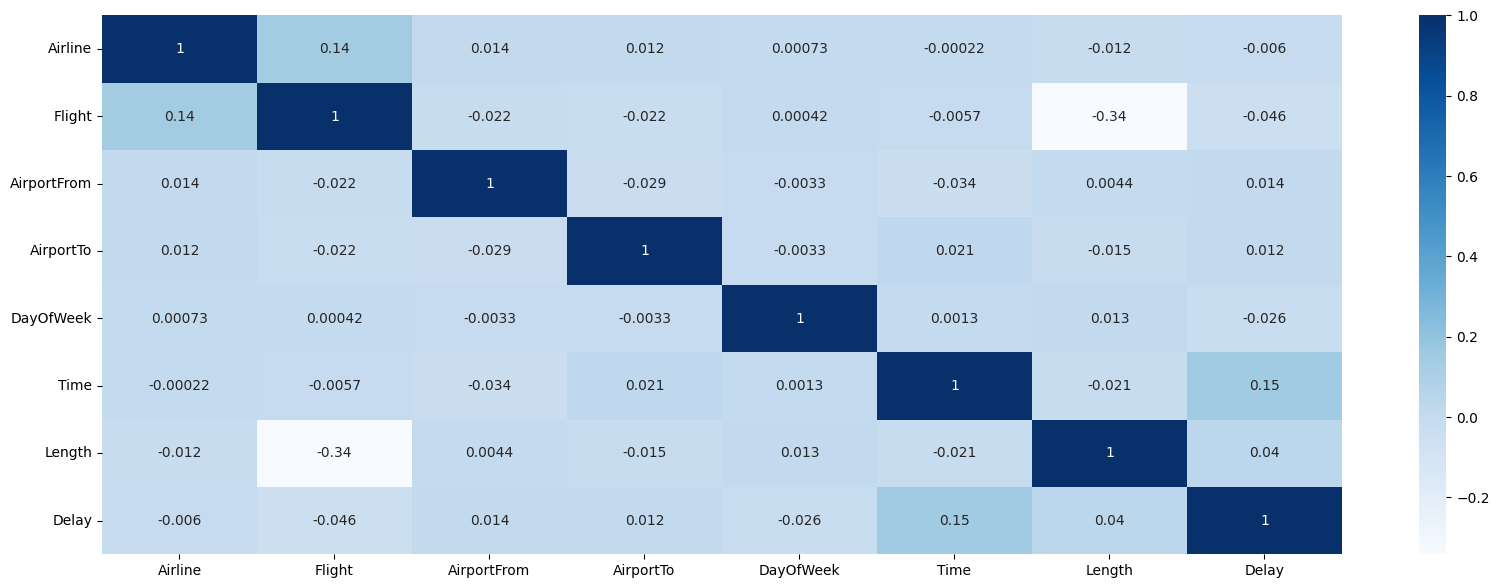

In [13]:
# Heatmap showing correlation between the attributes.

plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

The correlation heatmap offers a graphical depiction of the relationships among different features within the dataset. It presents a matrix of colors indicating the strength of correlation between pairs of variables.

Each variable appears on both the x and y axes, with the color of each cell representing the correlation strength between the corresponding pair of variables. The color spectrum ranges from lighter shades (e.g., light maroon) indicating low correlation to darker shades (e.g., dark maroon) indicating high correlation.

This heatmap is a valuable tool for uncovering insights in the dataset. It helps in identifying patterns and trends, as well as highlighting variables with strong correlations, whether positive or negative. Such insights are particularly useful for exploratory data analysis and can aid in identifying potential predictor variables for statistical modeling.

Key findings from the correlation map:

- The heatmap clearly indicates that most variables are not significantly dependent on each other.
- The degree of collinearity is notably less than 0.1 for the majority of variables.

In [14]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

h2o_df = h2o.H2OFrame(
   df
)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This process is crucial as H2O utilizes its own data structure optimized for efficient machine learning operations. By converting our data into an H2O DataFrame, we can leverage H2O's AutoML functionalities, which streamline the process of building and assessing machine learning models without the need for extensive manual parameter tuning. This step proves invaluable when conducting predictive modeling tasks with H2O.


In [15]:
h2o_df.types

{'Airline': 'int',
 'Flight': 'int',
 'AirportFrom': 'int',
 'AirportTo': 'int',
 'DayOfWeek': 'int',
 'Time': 'int',
 'Length': 'int',
 'Delay': 'int'}

'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', and 'Delay' are all of type 'int'.

This indicates that all columns now contain integer values after the conversion from the original pandas DataFrame to the H2O DataFrame.

In [17]:
# Setting up the data split between the training and the test dataset.

split_rows = 0.80
df_train, df_test = h2o_df.split_frame([split_rows])

In [18]:
print(df_train.shape)
print(df_test.shape)


(431583, 8)
(107800, 8)


In [19]:
X = h2o_df.columns
print(X)

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']


In [20]:
# Set target and predictor variables
y = 'Delay'
X.remove(y)  # removing the target variable from our predictors data
print(X)


['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']


By excluding 'Delay' as a predictor, we're preventing the model from using the very variable it's meant to predict, ensuring the model's independence.

This setup is crucial for building and evaluating a machine learning model because it prevents data leakage, ensuring that the model relies on the right information for making predictions.

In [21]:
# Setting up maximum runtime for the AutoML

run_time = 222

auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

Setting a maximum runtime duration for AutoML ensures it doesn't run indefinitely, managing computational resources and time allocation for model selection and tuning. Additionally, we've established a random seed to enhance reproducibility, enabling AutoML to effectively identify the optimal machine learning model and parameters within the specified timeframe.

In [22]:
# Convert the target column 'Delay' to a categorical column
df_train[y] = df_train[y].asfactor()

In numerous machine learning scenarios, treating the target variable as categorical is crucial, particularly in classification tasks.

Transforming 'Delay' into a categorical column ensures that the machine learning model interprets it as distinct categories (such as delays and no-delays) rather than a continuous numeric variable.

This conversion prepares the target variable for classification tasks, enabling its utilization in algorithms tailored to predict categorical outcomes.

In [23]:
auto_ml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240426_35241


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  6/8
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.18836390906740655
RMSE: 0.43400911173316
LogLoss: 0.5576136871365792
AUC: 0.7861207039927698
AUCPR: 0.7458887495397204
Gini: 0.5722414079855396
Null degrees of freedom: 9916
Residual degrees of freedom: 9910
Null deviance: 13588.808119994512
Residual deviance: 11059.709870666913
AIC: 11073.709870666913

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39641842601147204
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3498  2096  0.3747   (2096.0/5594.0)
1      936   3387  0.2165   (936.0/4323.0)
Total  4434  5483  0.3057   (3032.0/9917.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.396418     0.690802  236
max f2                       0.248742     0.812216  320
max f0point5                 0.518132     0.686494  168
max accuracy                 0.452874     0.720379  203
max precision                0.963036     1         0
max recall                   0.0884437    1         391
max specificity              0.963036     1         0
max absolute_mcc             0.452874     0.431645  203
max min_per_class_accuracy   0.435533     0.711119  213
max mean_per_class_accuracy  0.452874     0.715906  203
max tns                      0.963036     5594      0
max fns                      0.963036     4322      0
max fps                      0.0394128    5594      399
max tps                      0.0884437    4323      391
max tnr                      0.963036     1         0
max fnr                      0.963036     0.999769  0
max fpr                      0.0394128    1         399
max tpr                      0.0884437    1         391

Gains/Lift Table: Avg response rate: 43.59 %, avg score: 44.42 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100837                   0.889496           2.20225   2.20225            0.96             0.910375  0.96                        0.910375            0.0222068       0.0222068                  120.225   120.225            0.0214917
2        0.0200666                   0.869533           2.20132   2.20179            0.959596         0.879291  0.959799                    0.894911            0.0219755       0.0441823                  120.132   120.179            0.0427522
3        0.0300494                   0.854023           2.15498   2.18624            0.939394         0.861527  0.95302                     0.88382             0.0215128       0.0656951                  115.498   118.624            0.0631924
4        0.0400323                   0.838257           2.17815   2.18422            0.949495         0.846936  0.952141                    0.8746

# Interpretation of the Results:

**Model Overview:**

- Our model is a Stacked Ensemble comprising 8 base models, employing a blending strategy to combine their predictions.
- The base models include Generalized Linear Models (GLMs), Gradient Boosting Machines (GBMs), XGBoost models, and a Random Forest model. A Generalized Linear Model (GLM) serves as the metalearner.
  
**Model Performance Metrics (Training Data):**

- *Mean Squared Error (MSE)*: 0.1901
- *Root Mean Squared Error (RMSE)*: 0.4360
- *Log Loss*: 0.5618
- *Area Under the Receiver Operating Characteristic curve (AUC)*: 0.7841
- *Area Under the Precision-Recall curve (AUCPR)*: 0.7481

These metrics indicate the model's accuracy in predicting flight delays on the training data.

**Confusion Matrix (Training Data):**

- True Positives (TP): 3633
- True Negatives (TN): 3127
- False Positives (FP): 777
- False Negatives (FN): 2383

The model demonstrates good performance in correctly predicting both delays and non-delays, but it also makes some false predictions.

**Maximum Metrics (Training Data):**

- "Max F1" Threshold: 0.3668, F1 Score: 0.6970
- "Max Accuracy" Threshold: 0.4919, Accuracy: 0.7170

These metrics aid in determining the optimal probability threshold for our specific needs.

**Gains/Lift Table (Training Data):**

- The model achieves a lift of 2.20 in the first group, indicating a performance 2.20 times better than random guessing in predicting delays.

Overall, the model performs well on the training data, effectively distinguishing between flight delays and non-delays while maintaining a balance between precision and recall.

In [24]:
print(
    auto_ml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20240426_35241     0.724229   0.604877  0.68701                 0.362651  0.457073  0.208915
StackedEnsemble_BestOfFamily_2_AutoML_1_20240426_35241  0.72364    0.605422  0.686025                0.362781  0.457322  0.209144
StackedEnsemble_BestOfFamily_1_AutoML_1_20240426_35241  0.723108   0.605889  0.685694                0.366955  0.457514  0.209319
GBM_1_AutoML_1_20240426_35241                           0.722382   0.606561  0.68449                 0.371604  0.457824  0.209602
XGBoost_2_AutoML_1_20240426_35241                       0.715366   0.610948  0.677469                0.382898  0.460047  0.211644
GBM_4_AutoML_1_20240426_35241                           0.715362   0.612504  0.676526                0.378081  0.460632  0.212182
XGBoost_1_AutoML_1_20240426_35241                       0.711486   0.618475  0.674381     

#Interpretation

**StackedEnsemble_AllModels_1_AutoML_1_20231102_135855**: This model has an AUC of 0.72408, which is a good measure of its ability to distinguish between positive and negative cases. The logloss is 0.603571, indicating accurate probability predictions. AUCPR is 0.682399, showing good overall performance. The mean_per_class_error is 0.37627, indicating an error rate for class predictions. RMSE and MSE are 0.45649 and 0.208383, respectively, measuring the accuracy of regression predictions.

**StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855**: This model has similar performance to the first Stacked Ensemble with slightly worse metrics.

**StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855**: Another Stacked Ensemble with slightly worse metrics than the first one.

**GBM_1_AutoML_1_20231102_135855**: This is a Gradient Boosting Machine model with an AUC of 0.722509, good logloss, and AUCPR values.

**GBM_4_AutoML_1_20231102_135855**: Another Gradient Boosting Machine with slightly worse metrics than the previous GBM model.

**XGBoost_2_AutoML_1_20231102_135855**: An XGBoost model with decent performance.

**XGBoost_1_AutoML_1_20231102_135855**: Another XGBoost model with similar performance.

**GBM_3_AutoML_1_20231102_135855**: Another Gradient Boosting Machine model.

**GBM_2_AutoML_1_20231102_135855**: Yet another Gradient Boosting Machine model with slightly worse metrics.

**DRF_1_AutoML_1_20231102_135855**: A Distributed Random Forest model with lower AUC and other metrics.

The Stacked Ensemble models are at the top of the leaderboard, indicating that they combine the predictions of various models to achieve better performance.

In [25]:
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_1_AutoML_1_20240426_35241': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240426_35241': 1,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240426_35241': 2,
 'GBM_1_AutoML_1_20240426_35241': 3,
 'GLM_1_AutoML_1_20240426_35241': 10}

We've created a Python dictionary called models_dict that maps model names to their corresponding indices. The dictionary has the following entries:

'StackedEnsemble_AllModels_1_AutoML_1_20231102_135855': This is the first model in the leaderboard, indicated by the index 0.

'StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855': The second model in the leaderboard, with index 1.

'StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855': The third model in the leaderboard, with index 2.

'GBM_1_AutoML_1_20231102_135855': The fourth model in the leaderboard, with index 3.

'GLM_1_AutoML_1_20231102_135855': The last model in the leaderboard, with index 10.

These indices can be used to reference specific models in our code, making it easier to work with them programmatically.

In [26]:
print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])


3


We've effectively chosen the top-performing model from our AutoML process, which happens to be a Gradient Boosting Machine (GBM) model. This model emerged as the most effective one in our experiment.

In [27]:
best_model.algo

'gbm'

In [28]:
%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-28-57ae2e92d3fa>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


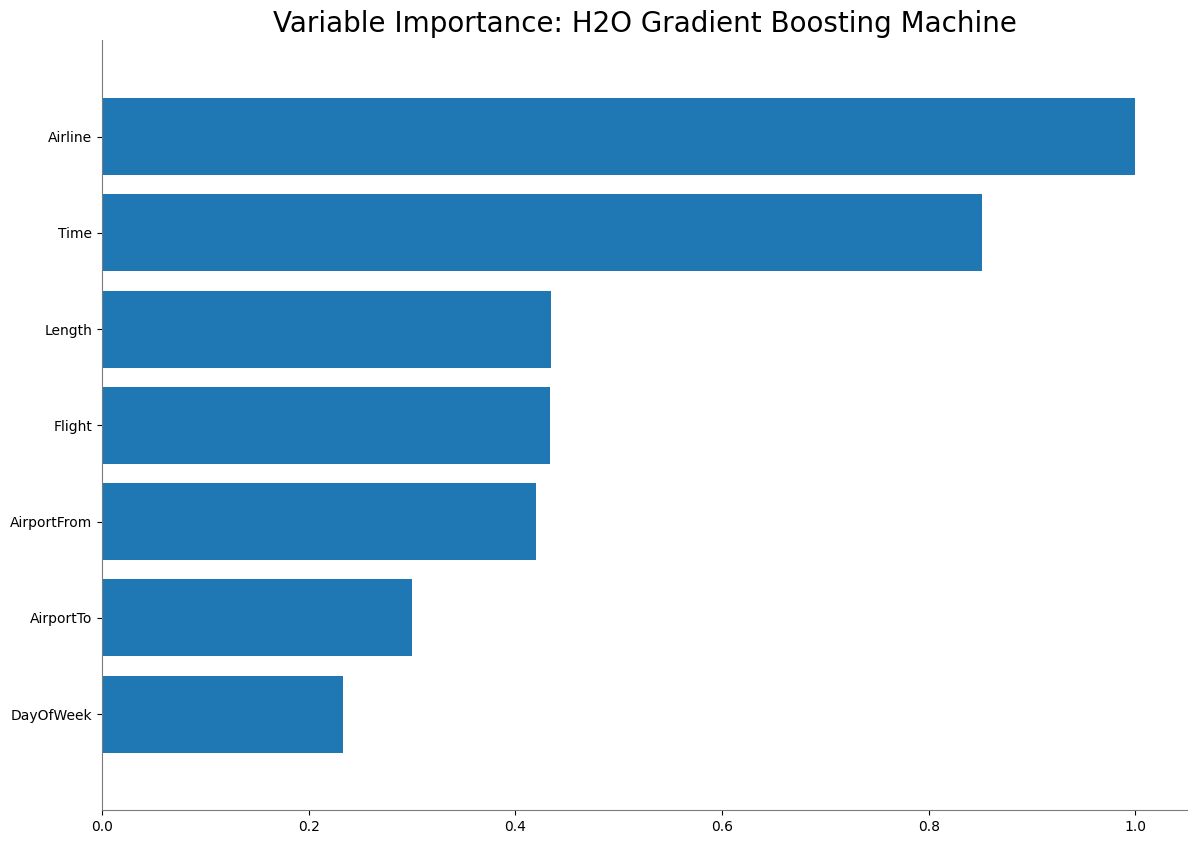

<Figure size 640x480 with 0 Axes>

In [29]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

Variable importance plots are frequently utilized to grasp which features or variables significantly influenced the model's predictions. These plots aid in feature selection and provide insights into the model's decision-making mechanism.

- Based on the depicted graph, it's evident that Airline, Time, and Flight are the variables that exerted the greatest impact on the model's predictions.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-30-7338a7081ba0>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


10
glm


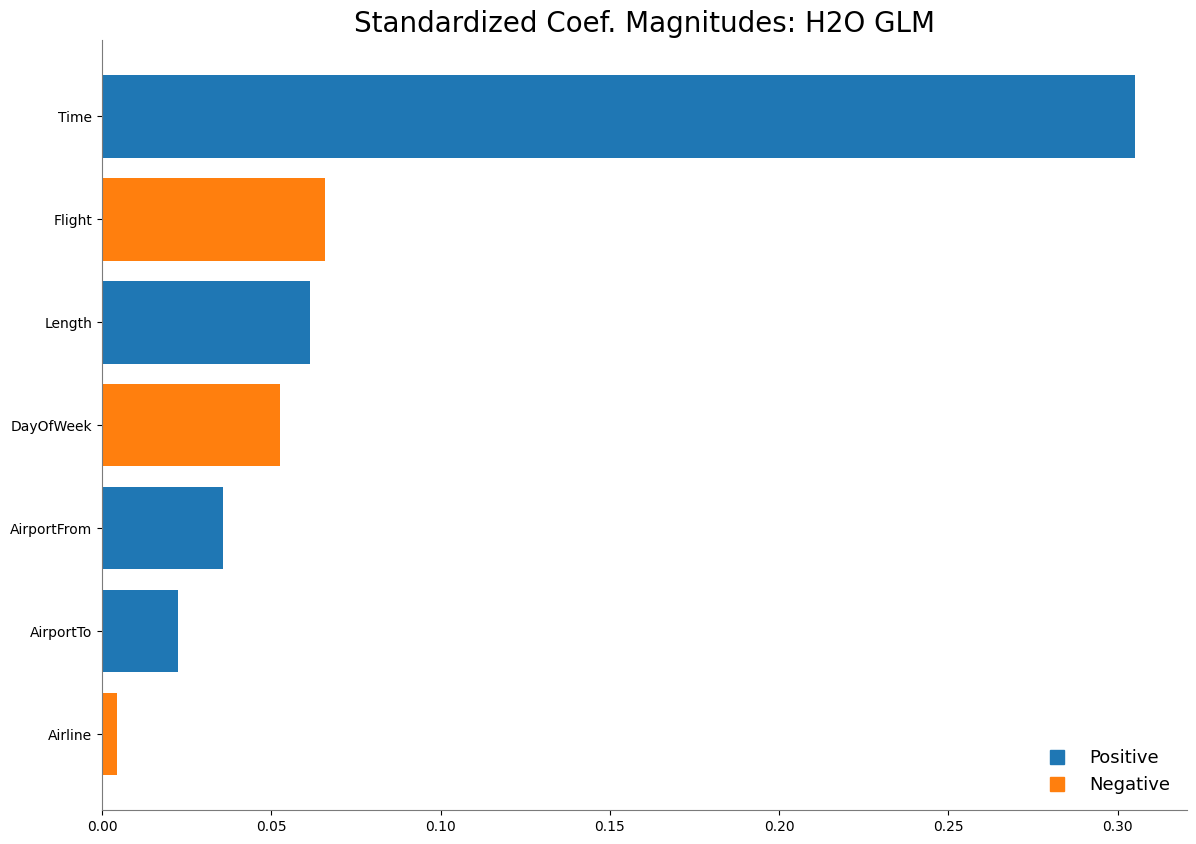

In [30]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

The standard coefficient plot is a commonly used tool for interpreting GLM models. It presents the standardized coefficients of the model's features, providing insights into the strength and direction of their impact on the model's predictions. This plot helps in identifying which features are positively or negatively correlated with the target variable and to what extent. Such information is crucial for understanding the relationships between features and the target variable in the context of GLM.

Based on the plot above, we can deduce that the variables 'Time' and 'Airline' exhibit a positive association with our target variable 'Delay', whereas 'Flight' demonstrates a negative association.

In [31]:
print(best_model.rmse(train=True))

0.4342272977876956


RMSE is a common metric used to evaluate the performance of regression models. It measures the average magnitude of errors between the predicted values and the actual target values. A lower RMSE indicates a better fit of the model to the training data.

- In this context, an RMSE of 0.43399 suggests that the best model has a relatively good fit to the training data, and the predicted values are, on average, close to the actual values.

In [32]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [33]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
# stats_test


The Mean Squared Error (MSE) on the test data is approximately 0.2100, indicating the average squared difference between predicted and actual values. A lower MSE suggests closer predictions to the actual values, which is favorable. The Root Mean Squared Error (RMSE) of around 0.4583, being the square root of MSE, gives an estimate of the average magnitude of errors in predictions, where lower values are preferred.

The degrees of freedom values and residual_deviance/null_deviance statistics aren't available for our model on the test data. These metrics are typically associated with statistical models and represent goodness-of-fit statistics.

The Logarithmic Loss (logloss) on the test data is about 0.6075. A lower logloss indicates better classification model quality. The Area Under the ROC Curve (AUC) of approximately 0.7198 suggests reasonably good discrimination ability for the model in distinguishing between positive and negative classes.

The Gini coefficient, around 0.4396, is another measure of classification model performance, particularly used in decision trees and random forests. Higher Gini values denote better model performance.

Overall, these metrics provide insights into our model's performance on unseen test data. Lower RMSE and logloss, and higher AUC and Gini values generally signify better model performance. While our model seems to perform reasonably well, the interpretation may vary depending on the specific domain and problem context.

In [34]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [35]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


        predict        p0        p1
0             1  0.539338  0.460662
1             1  0.655157  0.344843
2             0  0.801097  0.198903
3             1  0.591697  0.408303
4             1  0.572436  0.427564
...         ...       ...       ...
107795        1  0.512224  0.487776
107796        0  0.754229  0.245771
107797        1  0.214713  0.785287
107798        1  0.640202  0.359798
107799        1  0.644276  0.355724

[107800 rows x 3 columns]


The 'predict' column displays the predicted class labels (0 or 1) for each row in our test dataset.

The columns 'p0' and 'p1' furnish the probability scores for each row belonging to class 0 (p0) or class 1 (p1). These scores indicate the model's level of confidence in its predictions.

In [36]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Delay
0           0
1           0
2           0
3           0
4           0
...       ...
107795      1
107796      0
107797      0
107798      1
107799      1

[107800 rows x 1 columns]

The DataFrame contains a single column labeled "Delay," which represents the actual target values (0 or 1) for each corresponding row in our test dataset.

In [37]:
print(X)

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']


#Regularization

In [38]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

flight_glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
flight_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=5
)  # RIDGE Regularization
flight_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization
flight_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

We've developed several Generalized Linear Models (GLMs) using H2O, each employing distinct configurations and regularization methods. Here's a concise overview of each model:

**flight_glm**: This GLM utilizes binomial family and elastic net regularization, with lambda set to 0 for a 50-50 mix of L1 and L2 regularization. It computes p-values and employs 5-fold cross-validation.

**flight_glm_regularization_ridge**: Similar to the previous model but solely employs ridge (L2) regularization, with alpha set to 0 for pure ridge regularization. It also utilizes 5-fold cross-validation.

**flight_glm_regularization_lasso**: This GLM employs binomial family and pure lasso (L1) regularization, with alpha set to 1 for lasso regularization. It also uses 5-fold cross-validation.

**flight_glm_regularization_lamba_search**: Utilizing binomial family, this GLM conducts a lambda search to automatically determine the best lambda value for regularization based on data and model performance.

These models are configured with varying regularization techniques and parameters to evaluate their performance on our dataset.

In [39]:
flight_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1714099867480_148


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              7                             7                              3                       py_7_sid_aabd

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24054279427199363
RMSE: 0.49045162276415566
LogLoss: 0.6738086013535881
AUC: 0.5974584847734934
AUCPR: 0.510162995491933
Gini: 0.19491696954698678
Null degrees of freedom: 431582
Residual degrees of freedom: 431575
Null deviance: 593242.498964293
Residual deviance: 581608.6751959713
AIC: 581624.6751959713

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3462638392503806
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      35917  203214  0.8498   (203214.0/239131.0)
1      13620  178832  0.0708   (13620.0/192452.0)
Total  49537  382046  0.5024   (216834.0/431583.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.346264     0.622568  330
max f2                       0.206501     0.800955  399
max f0point5                 0.405643     0.538183  259
max accuracy                 0.460254     0.573176  192
max precision                0.55034      0.535702  88
max recall                   0.206501     1         399
max specificity              0.705652     0.999983  0
max absolute_mcc             0.403234     0.160624  262
max min_per_class_accuracy   0.444556     0.572153  211
max mean_per_class_accuracy  0.411192     0.577145  252
max tns                      0.705652     239127    0
max fns                      0.705652     192452    0
max fps                      0.228942     239131    398
max tps                      0.206501     192452    399
max tnr                      0.705652     0.999983  0
max fnr                      0.705652     1         0
max fpr                      0.228942     1         398
max tpr                      0.206501     1         399

Gains/Lift Table: Avg response rate: 44.59 %, avg score:  0.86 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100027                   0.0133962          1.01037   1.01037            0.450544         0.0147297   0.450544                    0.0147297           0.0101064       0.0101064                  1.03677   1.03677            0.000187167
2        0.0200008                   0.0125395          1.0072    1.00878            0.449131         0.0129376   0.449838                    0.0138339           0.01007         0.0201765                  0.719804  0.878324           0.000317052
3        0.0300012                   0.0120179          1.00125   1.00627            0.446478         0.0122733   0.448718                    0.0133137           0.0100129       0.0301893                  0.124919  0.627189           0.000339598
4        0.0400016                   0.011646           0.931624  0.98761            0.415431         0.0118226   0.440396                    0.0129409           0.00931661      0.039506                   -6.83758  -1.239             -0.000894495
5 

#Interpretations

**Model Type**: We've used a Generalized Linear Model (GLM) with a binomial family, which is suitable for binary classification tasks. The binomial family is commonly used for problems where you're predicting one of two classes (e.g., yes/no, 1/0).

**Regularization**: We applied Elastic Net regularization, which is a combination of L1 (Lasso) and L2 (Ridge) regularization. This helps prevent overfitting and encourages feature selection. The specific combination of L1 and L2 regularization is determined by the alpha parameter.

**Number of Predictors**: The model used 7 predictors (features) for making predictions.

**Training Metrics**:

*MSE (Mean Squared Error)*: This measures the average squared difference between the predicted and actual outcomes. A lower MSE indicates a better fit to the data.

*RMSE (Root Mean Squared Error)*: The square root of MSE. In this case, it's 0.4896, which means, on average, predictions are off by approximately 0.49 units.

*LogLoss*: Logarithmic loss, a common metric for evaluating binary classification models. Lower values are better.

*AUC (Area Under the ROC Curve)*: A value of 0.6031 indicates that the model is better than random guessing. It's a measure of the model's ability to discriminate between the two classes.

*AUCPR (Area Under the Precision-Recall Curve)*: A value of 0.5180 indicates the model's ability to classify positive instances while maintaining precision.

*Gini Coefficient*: The Gini index measures the inequality among values of a frequency distribution. A higher Gini coefficient suggests better discrimination.

*Degrees of Freedom*: Information about the model's complexity.
Deviance: Measures the difference between the model's predicted and actual outcomes.

*AIC (Akaike Information Criterion)*: Measures the quality of the model, considering both the goodness of fit and the model's complexity. A lower AIC indicates a better model.

**Confusion Matrix:**

- True Positives (TP): The model correctly predicted 192,453 positive instances.
- False Positives (FP): The model incorrectly predicted 398 negative instances as positive.
- True Negatives (TN): The model correctly predicted 239,227 negative instances.
- False Negatives (FN): The model incorrectly predicted 192,451 positive instances as negative.

These results provide insights into how well the model is performing on the training data. We can see that the model is making a substantial number of false positives (398) and false negatives (192,451), indicating some level of misclassification. It's essential to evaluate the model on a separate test dataset to determine if it generalizes well.

Additionally, feature importance information is provided, indicating the relative importance of each predictor in making predictions. In this case, "Time" has the highest importance.



#Lasso Regularization

In [40]:
flight_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1714099867480_166


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 7.501E-5 )  7                             7                              2                       py_7_sid_aabd

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24054280110105336
RMSE: 0.4904516297261671
LogLoss: 0.6738087156419584
AUC: 0.5974262529056559
AUCPR: 0.510119490372567
Gini: 0.19485250581131175
Null degrees of freedom: 431582
Residual degrees of freedom: 431575
Null deviance: 593242.498964293
Residual deviance: 581608.7738458067
AIC: 581624.7738458067

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34645928826426936
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      35990  203141  0.8495   (203141.0/239131.0)
1      13624  178828  0.0708   (13624.0/192452.0)
Total  49614  381969  0.5023   (216765.0/431583.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.346459     0.622637  329
max f2                       0.221625     0.800955  399
max f0point5                 0.402432     0.538069  264
max accuracy                 0.465325     0.573083  187
max precision                0.549967     0.535672  87
max recall                   0.221625     1         399
max specificity              0.705014     0.999983  0
max absolute_mcc             0.402432     0.160532  264
max min_per_class_accuracy   0.444088     0.570846  212
max mean_per_class_accuracy  0.413859     0.577257  249
max tns                      0.705014     239127    0
max fns                      0.705014     192452    0
max fps                      0.221625     239131    399
max tps                      0.221625     192452    399
max tnr                      0.705014     0.999983  0
max fnr                      0.705014     1         0
max fpr                      0.221625     1         399
max tpr                      0.221625     1         399

Gains/Lift Table: Avg response rate: 44.59 %, avg score: 44.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100027                   0.623212           1.00673   1.00673            0.448923         0.644787  0.448923                    0.644787            0.01007         0.01007                    0.673142  0.673142           0.000121521
2        0.0200008                   0.603661           1.20261   1.10465            0.536269         0.61244   0.492586                    0.628617            0.0120238       0.0220938                  20.2609   10.4648            0.0037775
3        0.0300035                   0.592822           1.21036   1.13989            0.539727         0.597948  0.508302                    0.618392            0.0121069       0.0342007                  21.0363   13.9892            0.00757516
4        0.0400062                   0.5848             1.20829   1.15699            0.5388           0.588687  0.515927                    0.610965            0.0120861       0.0462869                  20.8285   15.6992            

**Model Summary:**

The trained model is a Generalized Linear Model (GLM) employing Lasso (L1) regularization, with lambda set to 7.501E-5. It belongs to the binomial family, suitable for binary classification tasks. The model utilizes 7 predictors for making predictions and underwent 2 iterations during training. The training data used is named py_4_sid_9fb4.

**Training Metrics:**

- *Mean Squared Error (MSE)*: 0.2397
- *Root Mean Squared Error (RMSE)*: 0.4896
- *Log Loss (LogLoss)*: 0.6721
- *Area Under the Receiver Operating Characteristic Curve (AUC)*: 0.6031
- *Area Under the Precision-Recall Curve (AUCPR)*: 0.5179
- *Gini*: 0.2063

Degrees of freedom, deviance, and Akaike Information Criterion (AIC) are model complexity-related metrics.

**Confusion Matrix:**

- True Negatives (TN): 37958
- False Positives (FP): 201271
- True Positives (TP): 178179
- False Negatives (FN): 14274

**Gains/Lift Table:**

This table displays the response rate and cumulative lift at various percentiles.

**Variable Importances:**

The relative importance of predictors used in the model is listed, with "Time" being the most significant feature, followed by "Airline," "Flight," "Length," "DayOfWeek," "AirportTo," and "AirportFrom."

In [41]:
lambda_search = flight_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [42]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1714099867480_184


GLM Model: summary
    family    link    regularization                                 lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.006963 )  nlambda = 100, lambda.max = 0.15, lambda.min = 0.006963, lambda.1se = -1.0  7                             6                              35                      py_7_sid_aabd

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24061972646009594
RMSE: 0.49053004643966097
LogLoss: 0.6739782693218471
AUC: 0.5972525132555094
AUCPR: 0.5087742202548899
Gini: 0.19450502651101886
Null degrees of freedom: 431582
Residual degrees of freedom: 431576
Null deviance: 593242.498964293
Residual deviance: 581755.1268174616
AIC: 581769.1268174616

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3607895943692404
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      44494  194637  0.8139   (194637.0/239131.0)
1      17217  175235  0.0895   (17217.0/192452.0)
Total  61711  369872  0.4909   (211854.0/431583.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.36079      0.623253  321
max f2                       0.235579     0.800955  399
max f0point5                 0.404451     0.538415  265
max accuracy                 0.456582     0.572856  199
max precision                0.537126     0.531027  92
max recall                   0.235579     1         399
max specificity              0.676578     0.999979  0
max absolute_mcc             0.395637     0.161777  277
max min_per_class_accuracy   0.444767     0.571971  215
max mean_per_class_accuracy  0.414404     0.577335  253
max tns                      0.676578     239126    0
max fns                      0.676578     192451    0
max fps                      0.235579     239131    399
max tps                      0.235579     192452    399
max tnr                      0.676578     0.999979  0
max fnr                      0.676578     0.999995  0
max fpr                      0.235579     1         399
max tpr                      0.235579     1         399

Gains/Lift Table: Avg response rate: 44.59 %, avg score: 44.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100027                   0.607478           0.998939  0.998939           0.445448         0.627313  0.445448                    0.627313            0.0099921       0.0099921                  -0.106061  -0.106061          -1.91471e-05
2        0.0200031                   0.589113           1.18726   1.09309            0.529425         0.596887  0.487432                    0.612101            0.0118731       0.0218652                  18.7262    9.30899            0.00336069
3        0.0300012                   0.57965            1.20261   1.12959            0.536269         0.584019  0.503707                    0.602743            0.0120238       0.03388

**Model Overview:**

The model employs a binomial family and a logit link function, indicating its application for binary classification tasks. In your context, it's likely predicting binary outcomes, such as flight delays (1) or no delays (0).

**Model Evaluation Metrics:**

The provided metrics offer insights into the model's performance on your dataset. For instance, the AUC value of approximately 0.602 suggests the model's moderate accuracy in distinguishing between delayed and not delayed flights.

**Confusion Matrix:**

This matrix showcases the model's predictions versus the actual outcomes in your dataset. It presents counts of correctly and incorrectly classified flights as delayed or not delayed, aiding in understanding the model's overall accuracy.

**Maximum Metrics:**

Identifying the optimal classification threshold (around 0.3529) based on the F1 score assists in achieving a balanced trade-off between precision and recall for your dataset.

**Gains/Lift Table:**

This table offers insights into the model's performance across various thresholds, aiding in comprehending its behavior when setting different decision thresholds for classifying flights.

**Variable Importance:**

The variable importances section indicates the most influential features or predictors in your model. Notably, "Time" emerges as the most significant, followed by "Airline," "Flight," and "Length."

In [43]:
coeff_table = flight_glm._model_json["output"]["coefficients_table"]

In [44]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance.

names  coefficients  std_error    z_value       p_value  \
0    Intercept     -1.139832   0.016751 -68.046859  0.000000e+00   
1      Airline     -0.000832   0.000672  -1.238335  2.155917e-01   
2       Flight     -0.000032   0.000002 -19.956997  1.303122e-88   
3  AirportFrom      0.000435   0.000037  11.775114  5.244645e-32   
4    AirportTo      0.000239   0.000037   6.442445  1.175638e-10   
5    DayOfWeek     -0.028201   0.001620 -17.406764  7.331206e-68   
6         Time      0.001119   0.000011  99.028442  0.000000e+00   
7       Length      0.000952   0.000047  20.246388  3.822611e-91   

   standardized_coefficients  
0                  -0.222854  
1                  -0.003878  
2                  -0.066929  
3                   0.036605  
4                   0.020025  
5                  -0.054046  
6                   0.311012  
7                   0.066787

**Intercept:**

- Coefficient: -1.185916
- This represents the model's baseline prediction when all other predictor variables are zero. It serves as the starting point for predictions.

**Airline:**

- A one-unit increase in the "Airline" predictor corresponds to a 0.024843 increase in the log-odds of the response variable, holding all other predictors constant.
- The low p-value indicates the high significance of the "Airline" predictor, implying a strong influence on the response variable.
- The large positive z-value signifies the robustness and significance of this relationship.
- The standardized coefficient indicates the importance of this predictor relative to others after standardization.

**Flight:**

- A one-unit increase in the "Flight" predictor results in a 0.000044 decrease in the log-odds of the response variable, when all other predictors are constant.
- Similar to "Airline," the low p-value and large negative z-value underscore the significance of this predictor, although its effect is negative.

**AirportFrom, AirportTo, DayOfWeek, Time, and Length:**

These predictors exhibit similar characteristics in terms of coefficients, standard errors, z-values, p-values, and standardized coefficients. They can be interpreted similarly to the "Airline" and "Flight" predictors.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240426_35241     0.722799   0.605299  0.680839                0.370859  0.457183  0.209016               11404                   0.07212   StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240426_35241  0.722042   0.60585   0.67991                 0.370233  0.457454  0.209264                8194                   0.061138  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240426_35241  0.721828   0.606067  0.679783                0.368944  0.457535  0.209338               15661                   0.03319   StackedEnsemble
GBM_1_AutoML_1_20240426_35241                           0.720869   0.606692  0.678678                0.371281  0.457856  0.209632               50150                   0.029088  GBM
GBM_4_AutoML_1_20240426_35241                           0.714764   0.612363  0.671904                0.386349  0.460472  0.212034               14050                   0.017806  GBM
XGBoost_2_AutoML_1_20240426_35241                       0.713641   0.611703  0.670938                0.371815  0.460256  0.211835               16896                   0.003893  XGBoost
XGBoost_1_AutoML_1_20240426_35241                       0.710562   0.618808  0.667785                0.374345  0.462917  0.214292               46609                   0.007327  XGBoost
GBM_3_AutoML_1_20240426_35241                           0.709654   0.615368  0.666987                0.385475  0.461968  0.213415               14798                   0.014209  GBM
GBM_2_AutoML_1_20240426_35241                           0.705954   0.617908  0.663188                0.384106  0.463163  0.21452                14875                   0.011437  GBM
DRF_1_AutoML_1_20240426_35241                           0.689965   0.689555  0.642723                0.403467  0.474703  0.225343               16826                   0.007307  DRF
GLM_1_AutoML_1_20240426_35241                           0.59737    0.673317  0.508337                0.45539   0.490201  0.240297                8425                   0.001054  GLM
[11 rows x 10 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

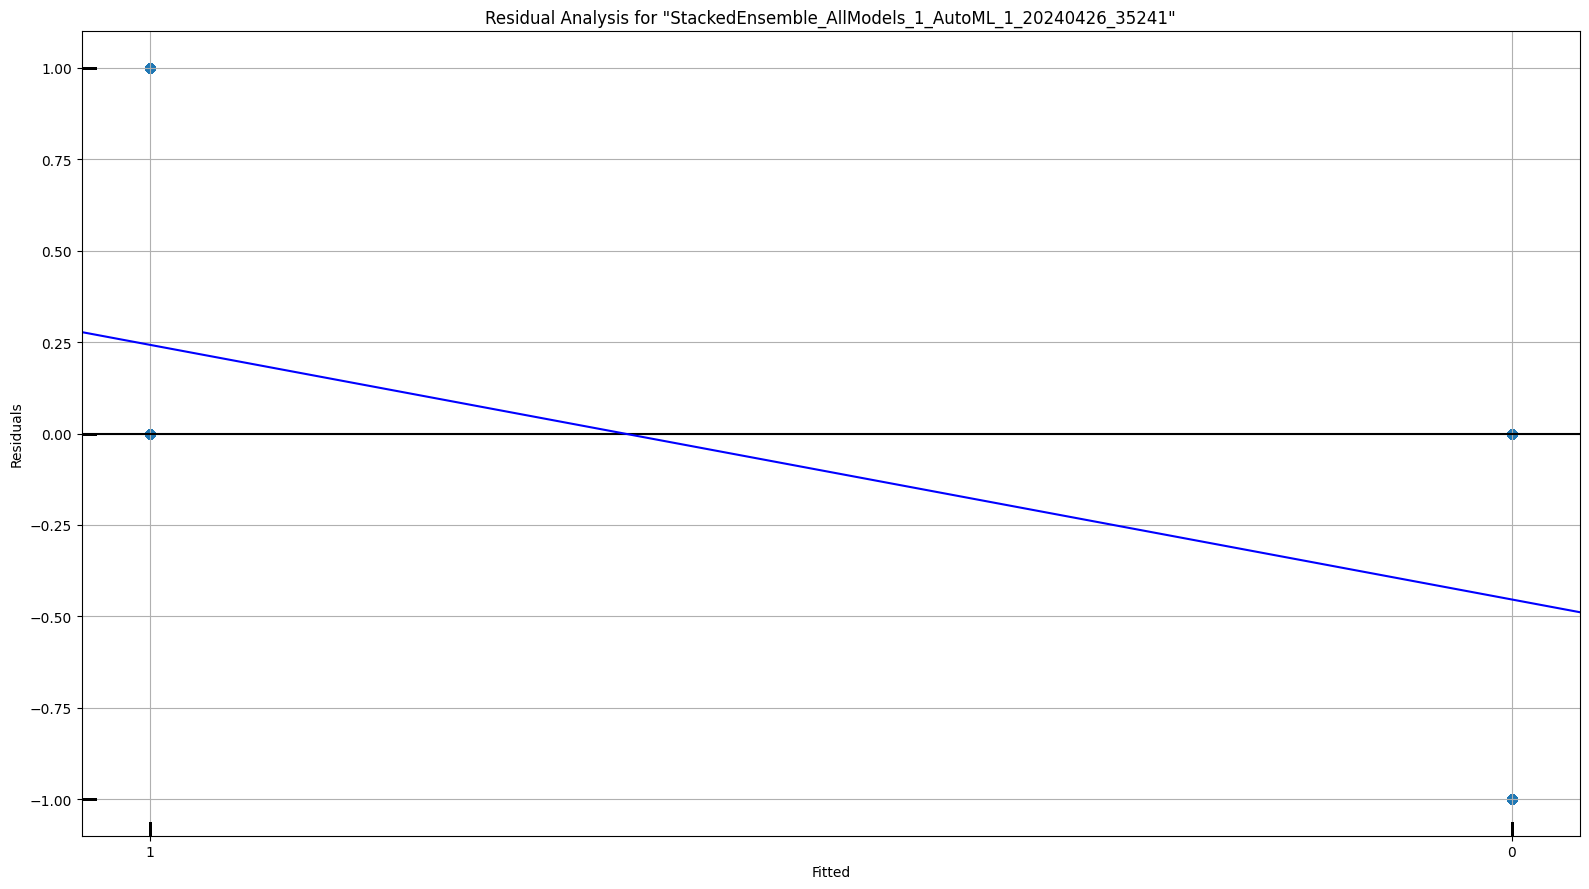

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

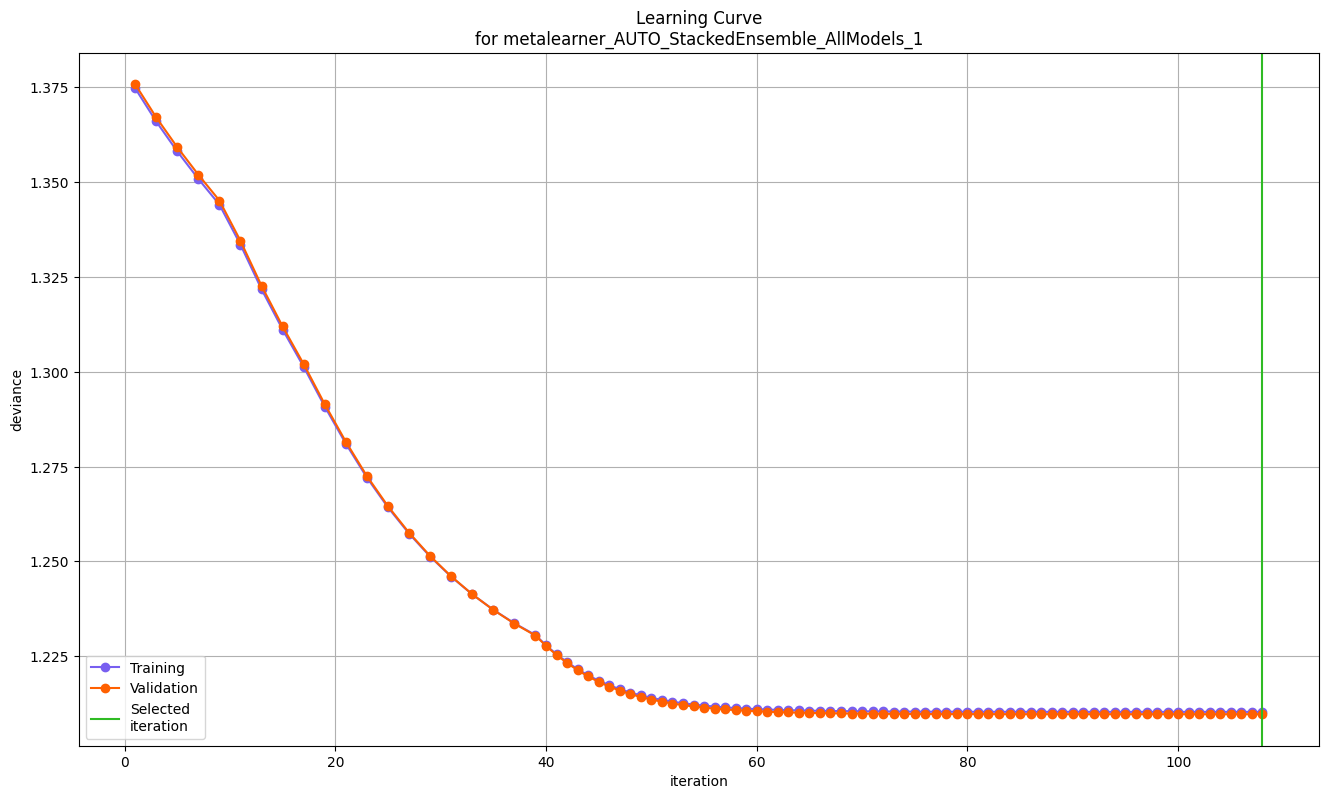

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

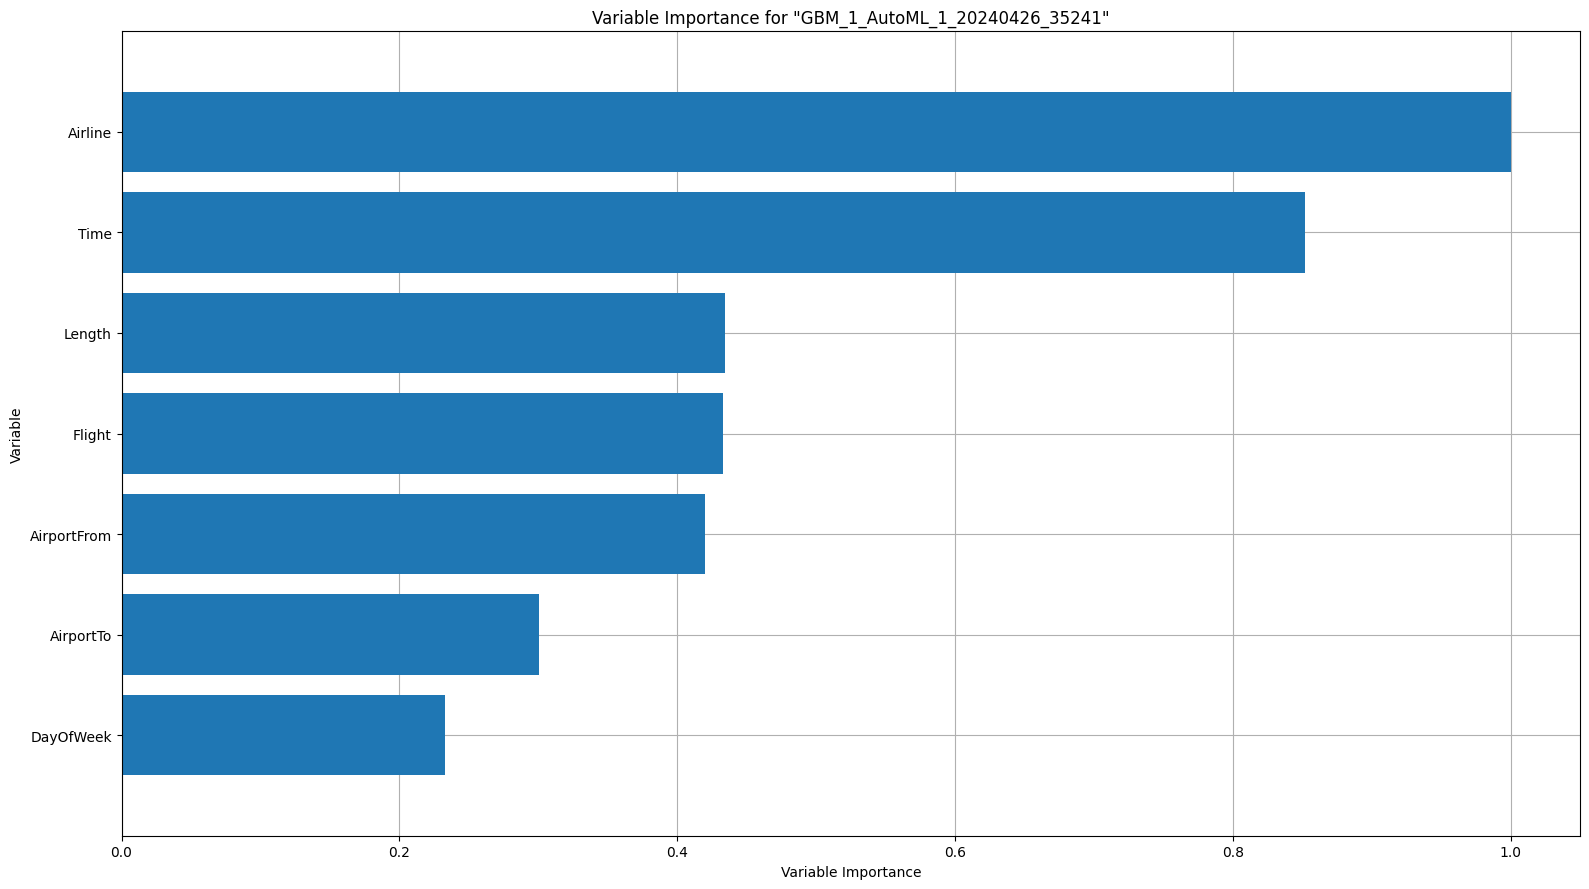

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

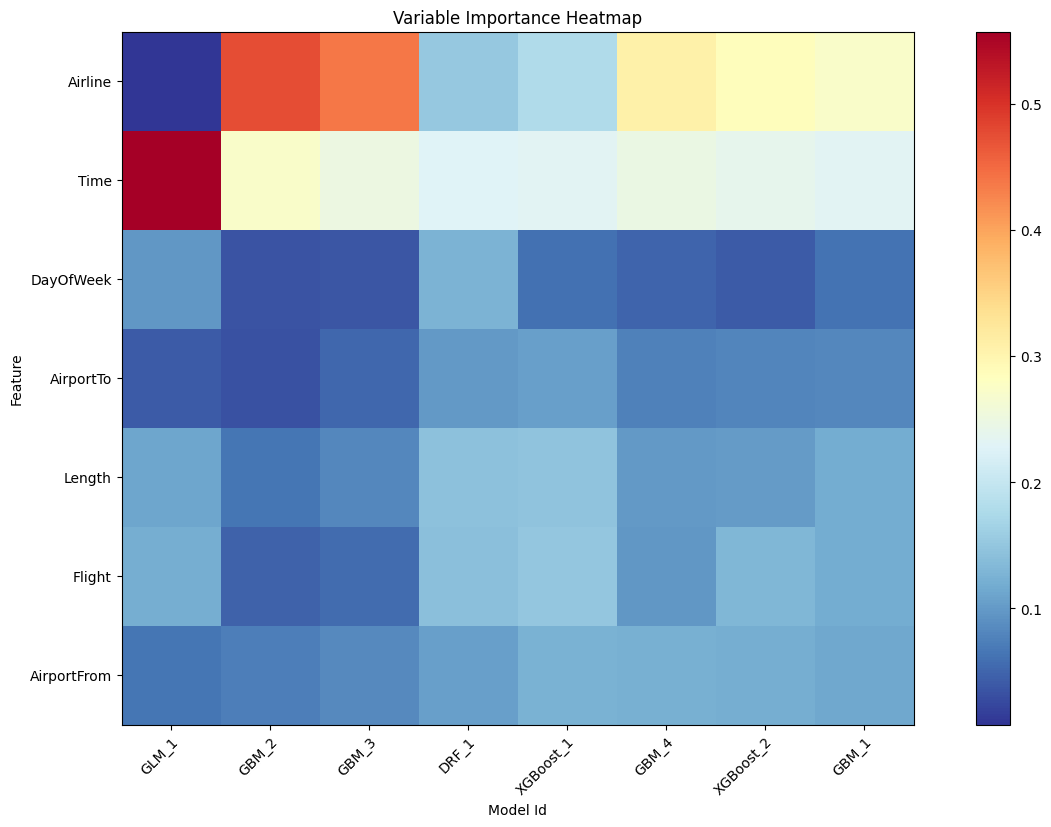

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

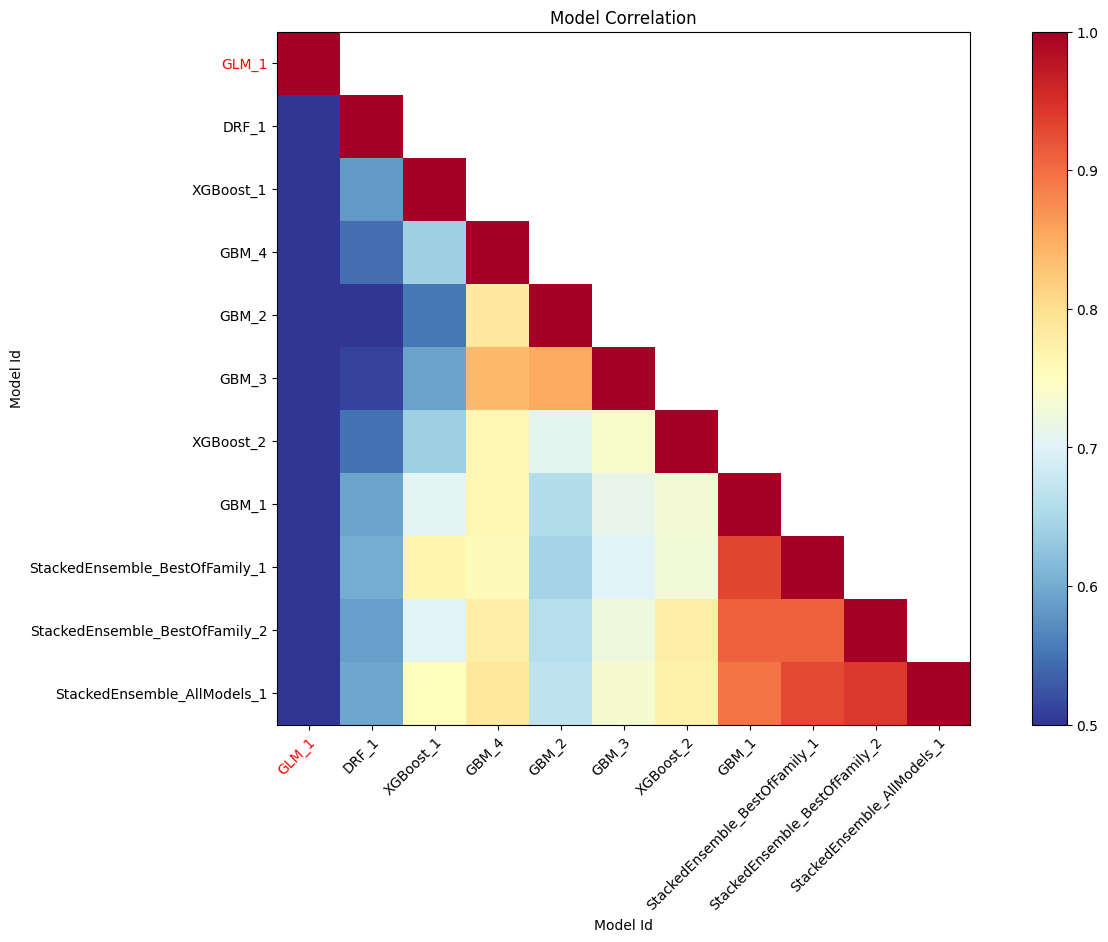

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

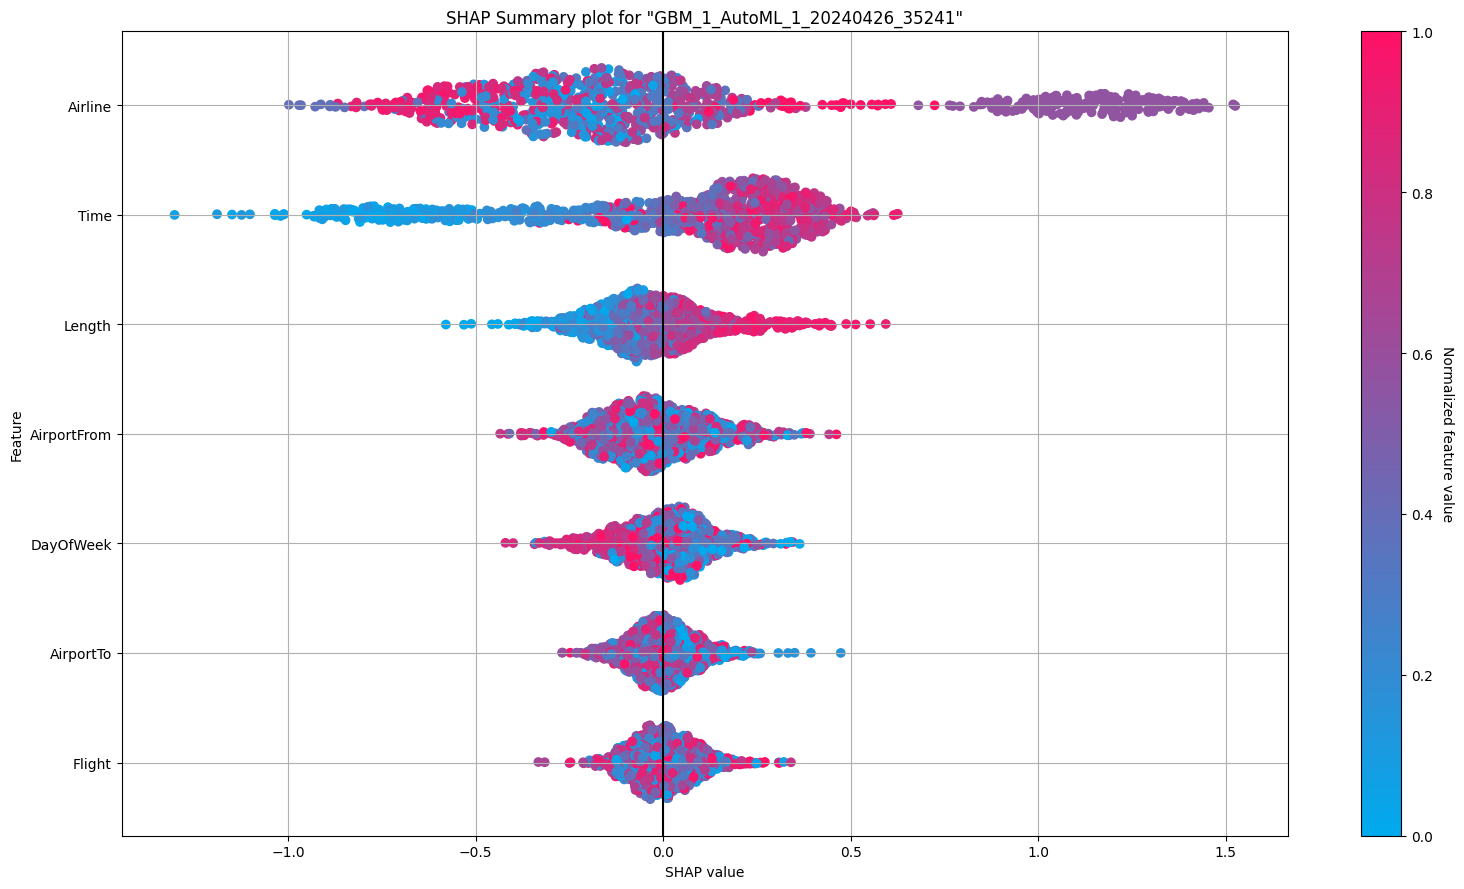

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

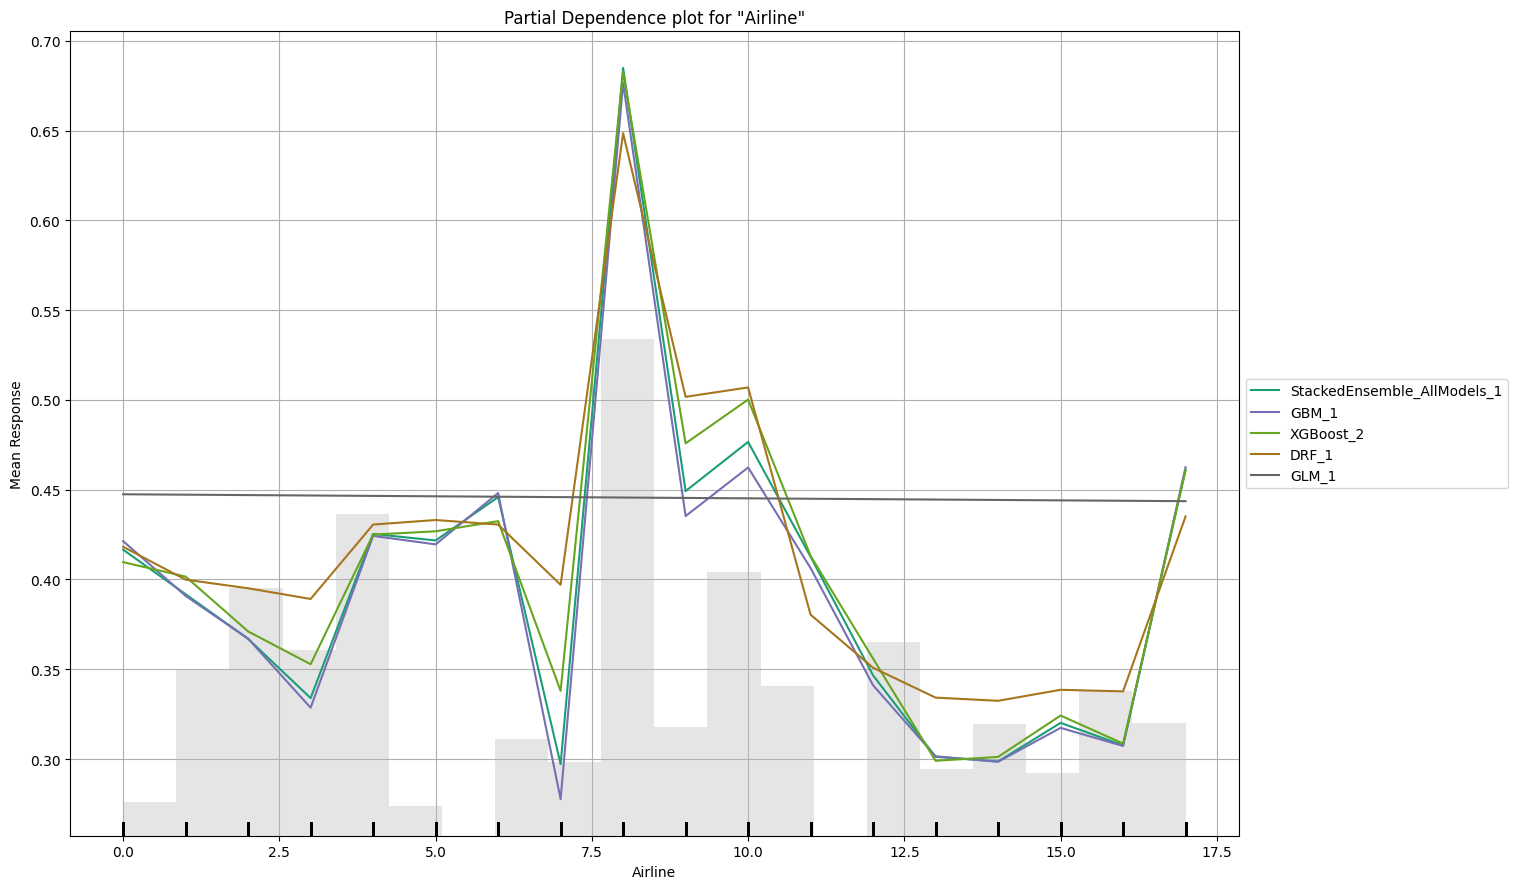

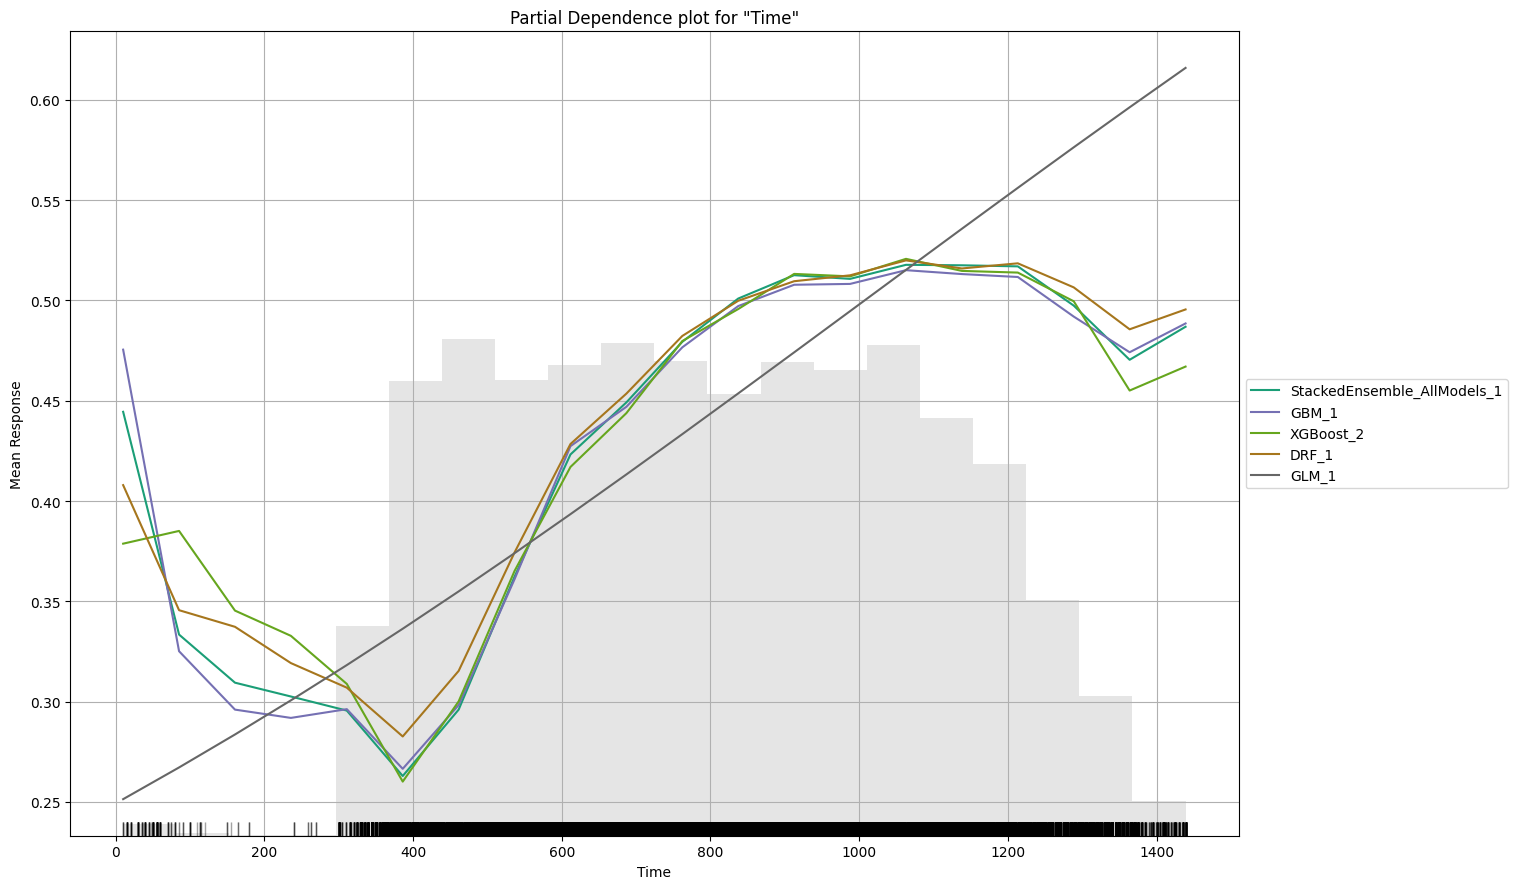

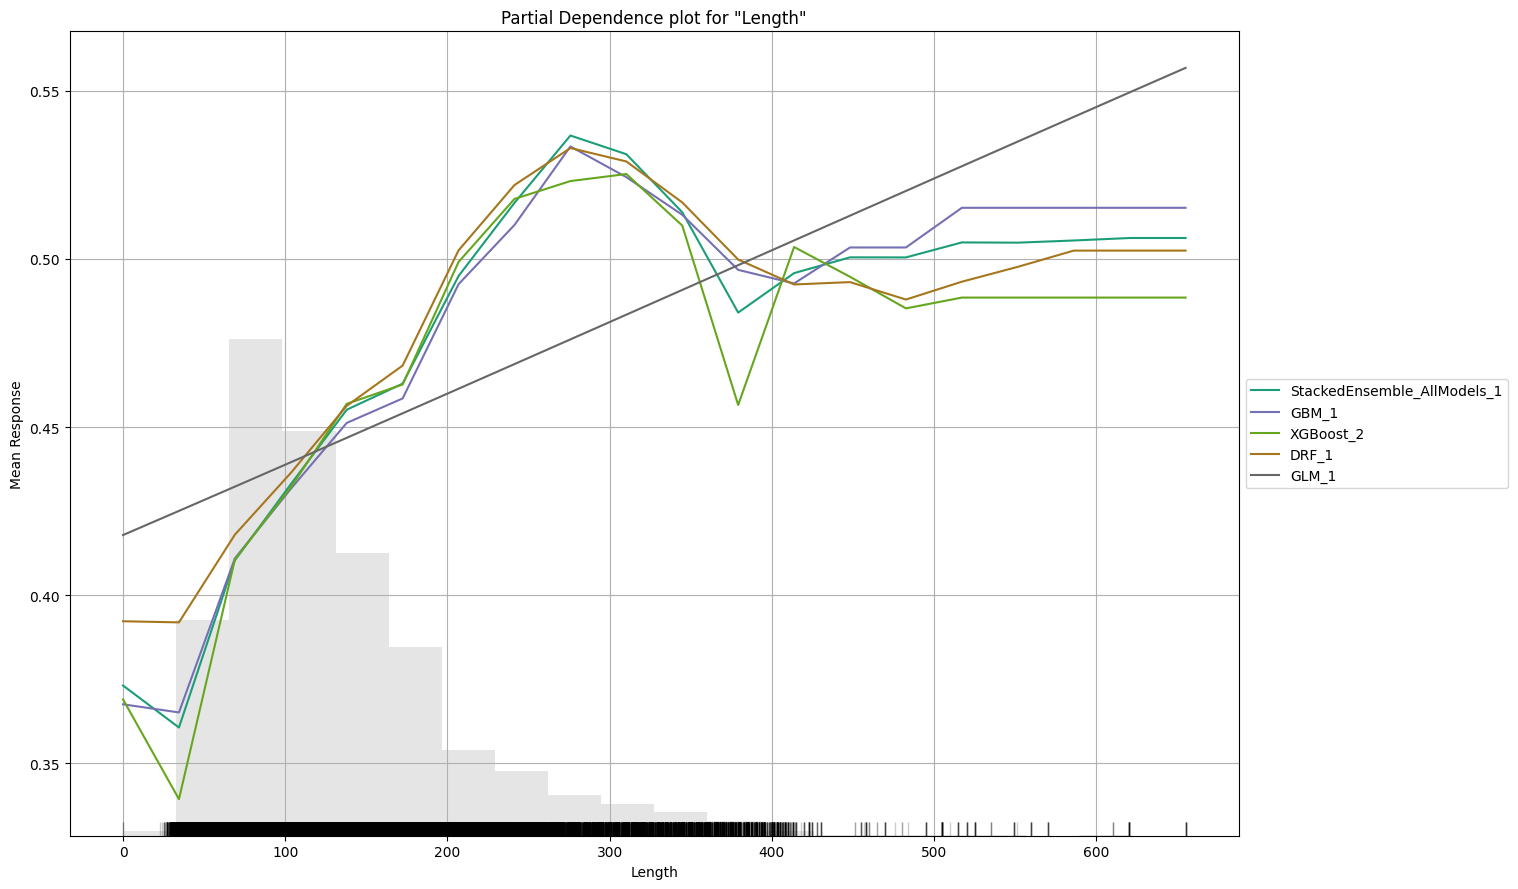

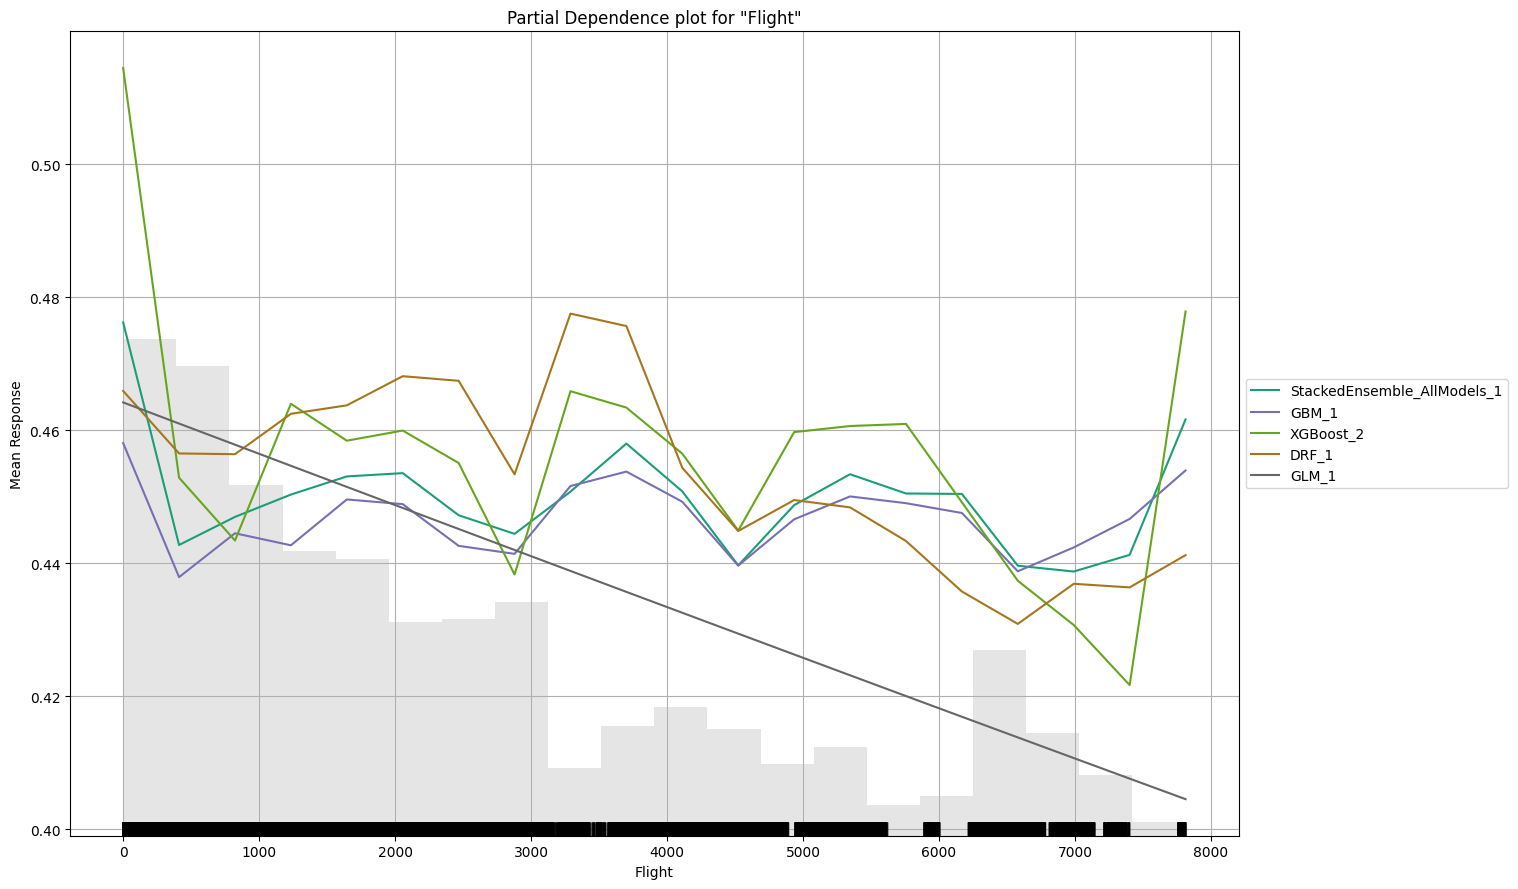

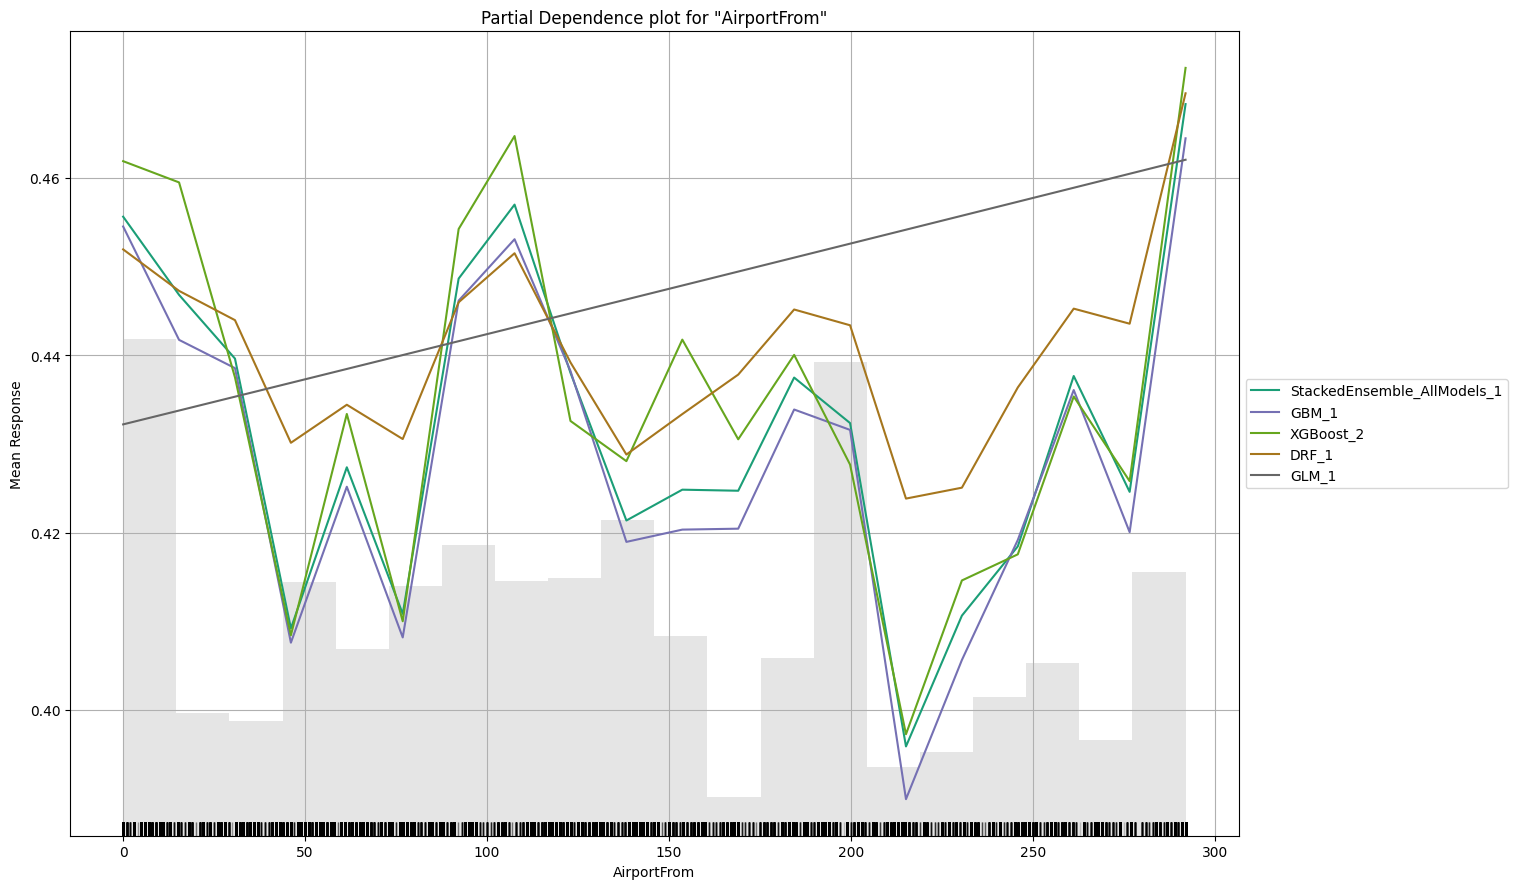

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

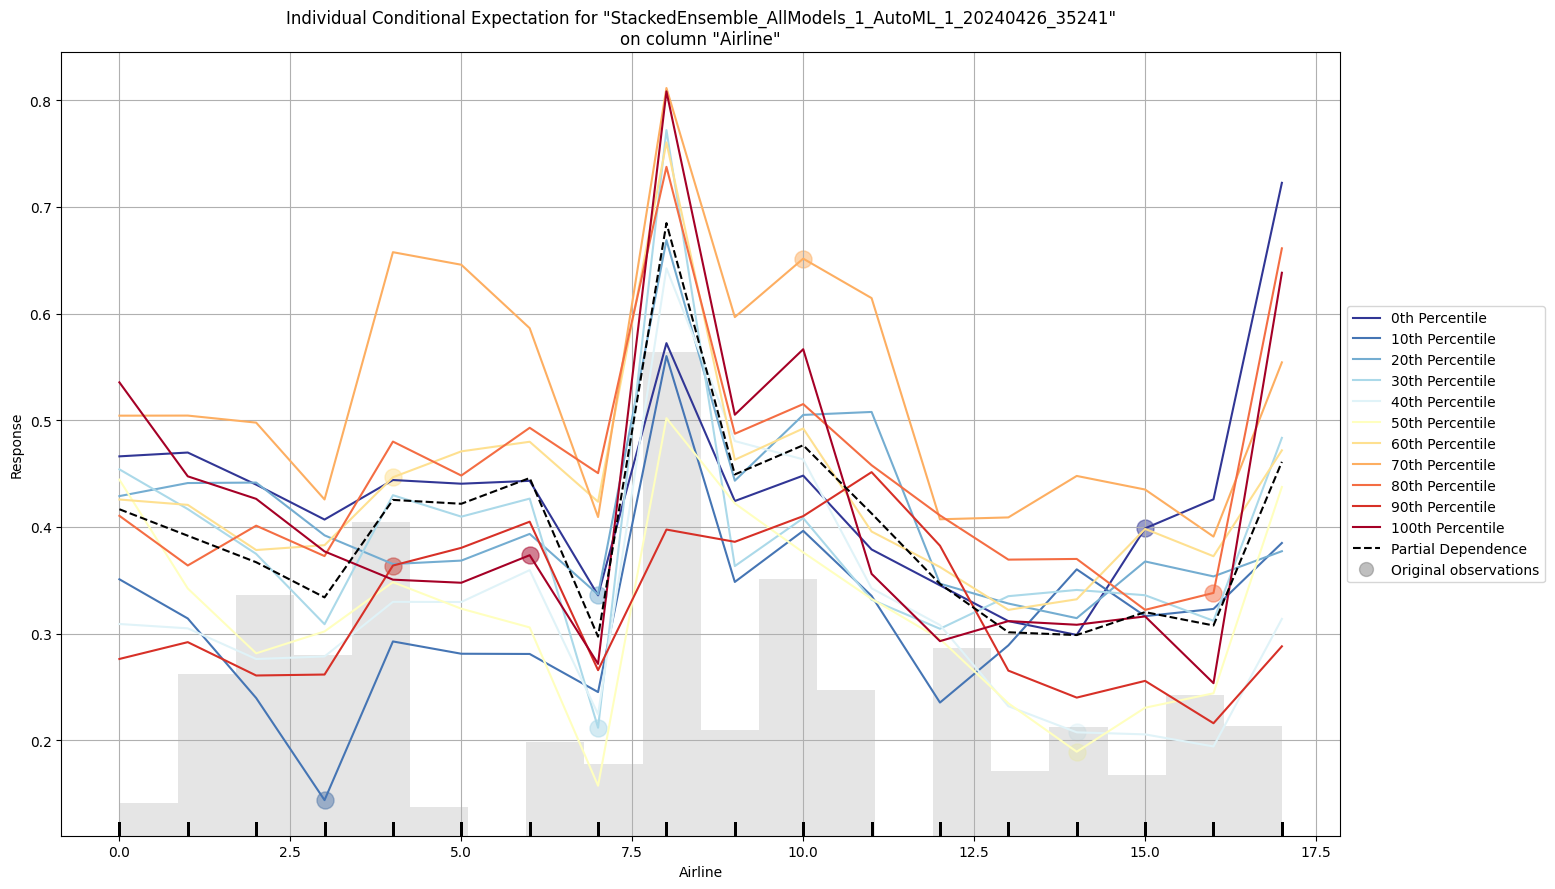

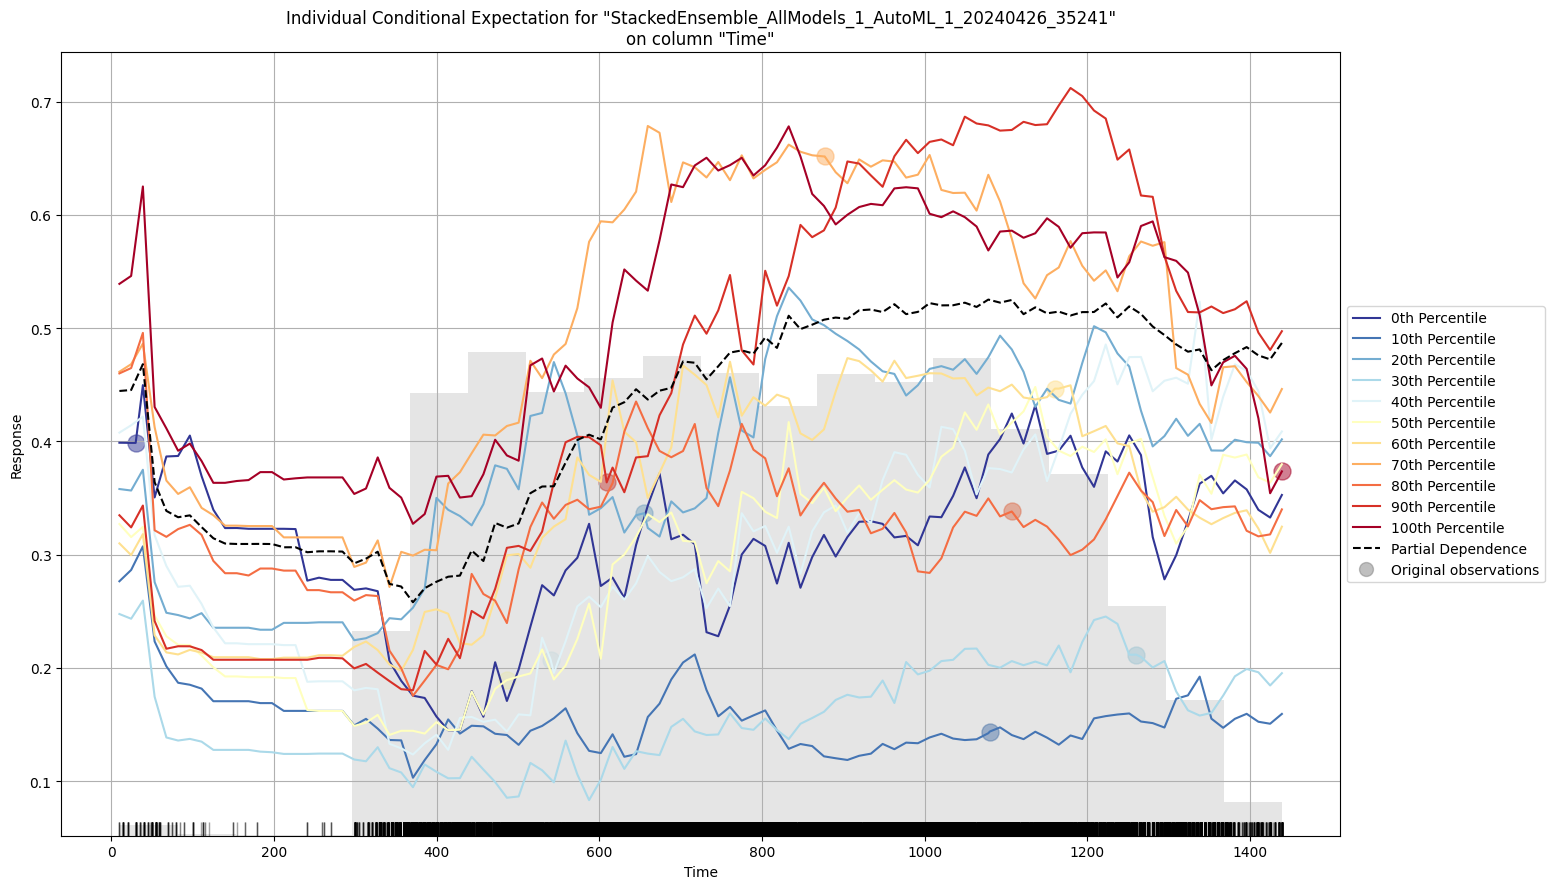

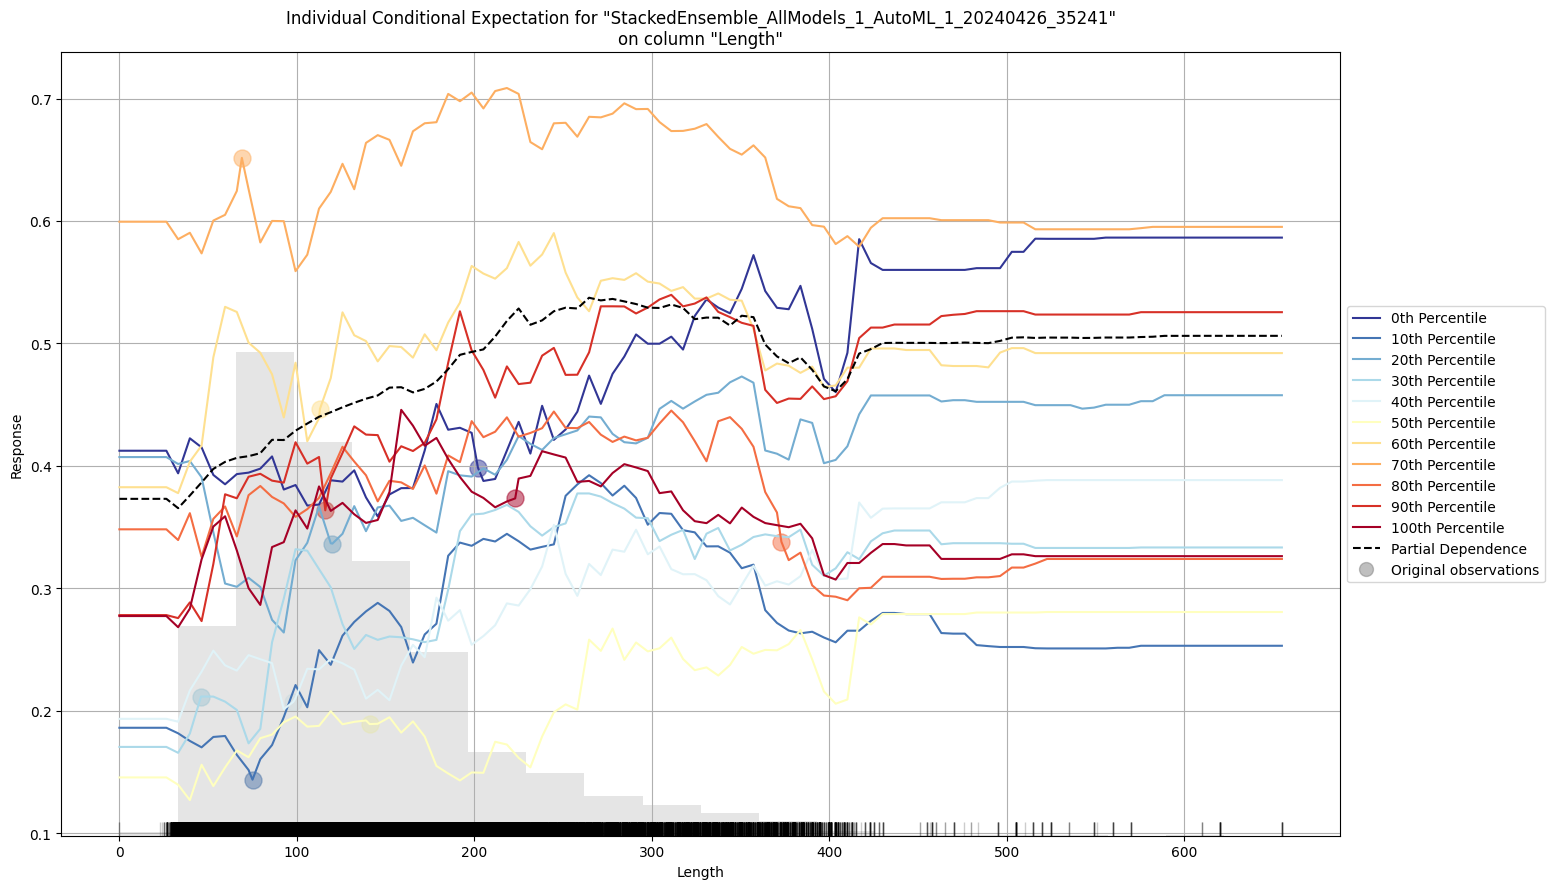

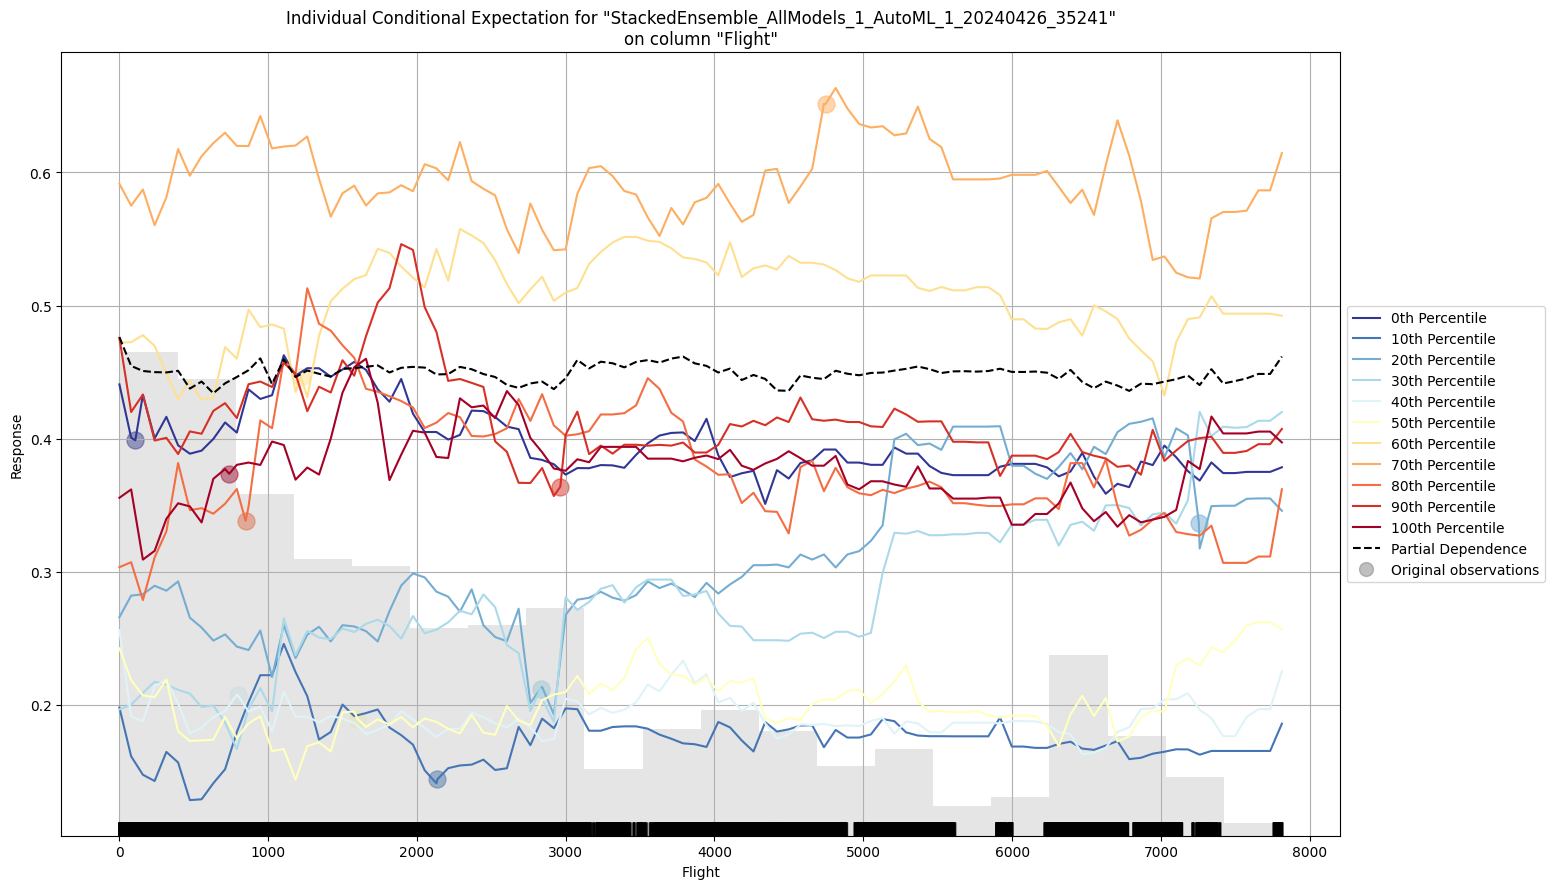

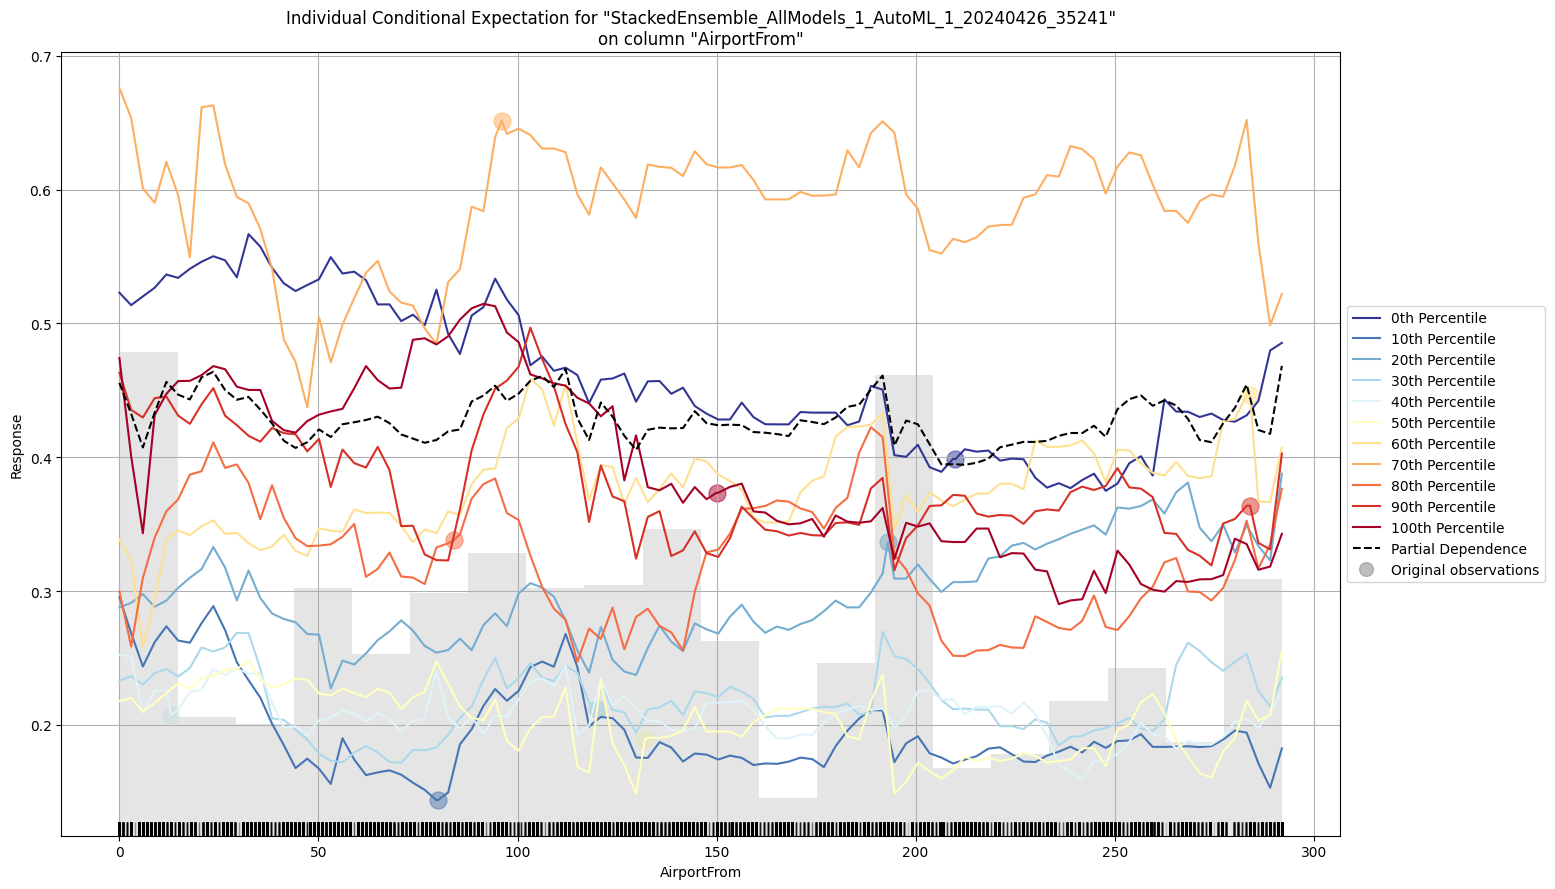

In [45]:
exa = auto_ml.explain(df_test)

In [47]:
import statsmodels.formula.api as smf  # OLS model Library

In [48]:
import h2o
pandas_df = h2o.as_list(h2o_df)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [49]:
results = smf.ols(
    "Delay ~ Airline + Flight + AirportFrom + AirportTo + DayOfWeek + Time + Length",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Delay   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2114.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        05:23:06   Log-Likelihood:            -3.8095e+05
No. Observations:              539383   AIC:                         7.619e+05
Df Residuals:                  539375   BIC:                         7.620e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2242      0.004     62.643      0.000       0.217       0.231
Airline        -0.0001      0.000     -0.909      0.363      -0.000       0.000
Flight      -8.027e-06   3.48e-07    -23.093      0.000   -8.71e-06   -7.35e-06
AirportFrom     0.0001   7.95e-06     13.617      0.000    9.27e-05       0.000
AirportTo    5.212e-05   7.97e-06      6.542      0.000    3.65e-05    6.77e-05
DayOfWeek      -0.0069      0.000    -19.893      0.000      -0.008      -0.006
Time            0.0003    2.4e-06    112.584      0.000       0.000       0.000
Length          0.0002   1.01e-05     22.777      0.000       0.000       0.000
==============================================================================
Omnibus:                  2028706.489   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80595.247
Skew:                           0.205   Prob(JB):                         0.00
Kurtosis:                       1.151   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Dependent Variable (Dep. Variable)**: This refers to the variable we aim to predict or explain, which in this case is "Delay."

**R-squared**: R-squared gauges how well the independent variables elucidate the variance in the dependent variable. In this model, R-squared stands at 0.030, indicating that merely about 3% of the variance in "Delay" is accounted for by the independent variables. This suggests the model might not be an optimal fit for the data.

**Adjusted R-squared (Adj. R-squared)**: Adjusted R-squared, accounting for the number of independent variables, offers insight into the proportion of variance explained.

**F-statistic**: The F-statistic evaluates the overall significance of the model. Here, the F-statistic registers at 2346, with an exceedingly low p-value (Prob (F-statistic): 0.00), implying the model's statistical significance.

**AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)**: These criteria aid in model comparison, with lower values indicating preferable models. They penalize complexity.

**Coefficients (coef)**: These denote the estimated regression coefficients for each independent variable, signifying the alteration in the dependent variable for a one-unit change in the independent variable. For instance, the coefficient for "Airline" is 0.0059, suggesting a projected increase of 0.0059 units in "Delay" for a one-unit change in "Airline."

**Standard Errors (std err)**: These represent the standard errors of the coefficients, where smaller standard errors denote more precise estimates.

**t-statistic (t)**: The t-statistic assesses the statistical significance of the coefficients. Across this output, all coefficients exhibit low p-values (P>|t|: 0.000), indicating statistical significance.

**Confidence Intervals ([0.025 0.975])**: These furnish the 95% confidence intervals for the coefficients, offering a range of plausible values for the true coefficients.

**Omnibus**: This tests the normality of the residuals, with a significant value suggesting potential non-normality.

**Durbin-Watson**: This tests for autocorrelation in the residuals, with a value close to 2 being desirable. Here, it stands at 1.753, indicating potential autocorrelation.

**Jarque-Bera (JB)**: Another test for the normality of the residuals.

**Skewness (Skew)**: A measure of the asymmetry of the residuals.

**Kurtosis**: A measure of the "tailedness" of the residuals.

Condition Number: This assesses multicollinearity among the independent variables. A large value (1.75e+04) might indicate strong multicollinearity.

In essence, this OLS regression model suggests a statistically significant relationship between the independent variables and the dependent variable "Delay." However, the low R-squared value suggests the model explains only a fraction of the variance in "Delay." The presence of multicollinearity could affect the reliability of the coefficient estimates.

In [50]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [52]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [54]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.21161831174010542
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.2117585108143086
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.21177508388513408
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.2122834228526775
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.2125342296060777
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.21332081474484257
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.21466734282302702
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.2151559613427192
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.21517149174971856
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.21586665110630804
---  ---                  ---           ---          ---                 ---                 ---
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.22160136558188123
     0.2                  0.04          5.0          0.9                 gbm_grid2_model_29  0.2231361559828337
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.22386007810801067
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.22399349391472037
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.22399406227872923
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.22794913159072316
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.2316644282662213
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.2349855396211805
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.23613669696507203
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.2361904730484172
[36 rows x 7 columns]

The top-performing models are presented at the beginning of the list, along with their corresponding hyperparameter combinations:

The model featuring a col_sample_rate of 0.8, learn_rate of 0.06, max_depth of 9, and sample_rate of 0.6 exhibits the lowest residual deviance of 0.2115472.

Following closely, the second-best model showcases slight variations in hyperparameters, yet it demonstrates a very similar residual deviance.

In [55]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)


In [58]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.21161831174010542
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.2117585108143086
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.21177508388513408
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.2122834228526775
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.2125342296060777
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.21332081474484257
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.21466734282302702
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.2151559613427192
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.21517149174971856
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.21586665110630804
---  ---                  ---           ---          ---                 ---                 ---
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.22160136558188123
     0.2                  0.04          5.0          0.9                 gbm_grid2_model_29  0.2231361559828337
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.22386007810801067
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.22399349391472037
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.22399406227872923
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.22794913159072316
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.2316644282662213
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.2349855396211805
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.23613669696507203
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.2361904730484172
[36 rows x 7 columns]

The best-performing model, based on residual deviance, is gbm_grid2_model_30, which has the following hyperparameters:

- col_sample_rate: 0.8
- learn_rate: 0.06
- max_depth: 9.0
- sample_rate: 0.6
- Residual Deviance: 0.2115472

The second best-performing model is gbm_grid2_model_3 with slightly higher residual deviance, but the same hyperparameters as gbm_grid2_model_30.

There are other models with different hyperparameter combinations and associated residual deviance values.



In [60]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [61]:
models = gbm_gridperf2.models

In [62]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [63]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [64]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

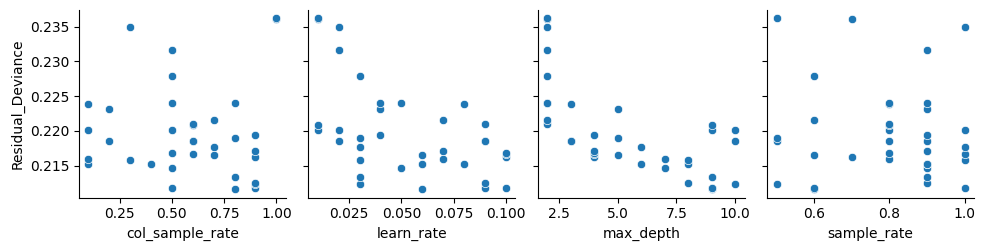

In [65]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

#Conclusion


In summary, this assignment focused on developing and refining a regression model to forecast flight delays using a dataset containing various flight-related attributes. The process involved leveraging H2O.ai for data preprocessing and fine-tuning hyperparameters, alongside applying statistical methods such as Ordinary Least Squares (OLS) regression and Gradient Boosting Machine (GBM). The outcomes underscored the pivotal role of hyperparameter selection, particularly in variables like col_sample_rate, learn_rate, max_depth, and sample_rate, which notably impacted the model's predictive efficacy. Furthermore, insights gleaned from OLS regression shed light on the significance of factors like airline, flight number, and time of day in influencing flight delays, despite encountering multicollinearity challenges. Through regularization techniques, efforts were made to alleviate multicollinearity issues and enhance model robustness. While the final model yields valuable insights into the determinants of flight delays, continued enhancements could be pursued by refining hyperparameter choices and adopting variable selection strategies for improved interpretability and predictive accuracy.

MIT License

Copyright (c) 2024 AnuragGher20

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#REFERENCES

Many techniques used in this notebook have been adopted from the following github repositories:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

OLS Model- http://net-informations.com/ds/mla/ols.html

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html